In [ ]:
import pandas as pd 

train_data='machine-1-1_test.csv'
test_data='machine-1-1_train.csv'

df_train=pd.read_csv(train_data)
df_test=pd.read_csv(test_data)



In [8]:
df_train.head()

,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts
0,0,0.032258,0.039195,0.027871,0.915385,0.020011,0.000122,0.060266,0.027397,0.062195,0.041221,0.000045
1,1,0.043011,0.048729,0.033445,0.915385,0.019160,0.001722,0.054029,0.027397,0.051131,0.036651,0.000045
2,2,0.043011,0.034958,0.032330,0.915385,0.020011,0.000122,0.057157,0.027397,0.047139,0.035940,0.000045
3,3,0.032258,0.028602,0.030100,0.912821,0.021289,0.000000,0.058962,0.013699,0.055012,0.038168,0.000022
4,4,0.032258,0.019068,0.026756,0.912821,0.018734,0.000000,0.047945,0.013699,0.050170,0.037274,0.000034


**Revert to the original column names**

In [9]:
new_column_names = [
    'cpu_r', 'load_1', 'load_5', 'load_15', 'mem_shmem', 'mem_u', 'mem_u_e', 'total_mem',
    'disk_q', 'disk_r', 'disk_rb', 'disk_svc', 'disk_u', 'disk_w', 'disk_wa', 'disk_wb',
    'si', 'so', 'eth1_fi', 'eth1_fo', 'eth1_pi', 'eth1_po', 'tcp_tw', 'tcp_use',
    'active_opens', 'curr_estab', 'in_errs', 'in_segs', 'listen_overflows', 'out_rsts',
    'out_segs', 'passive_opens', 'retransegs', 'tcp_timeouts', 'udp_in_dg', 'udp_out_dg',
    'udp_rcv_buf_errs', 'udp_snd_buf_errs'
]

In [10]:
df_train.shape

(28479, 12)

In [11]:
df_test.head()

,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts,label
0,0,0.075269,0.065678,0.070234,0.933333,0.031081,0.000000,0.067808,0.027397,0.121988,0.091978,0.000034,0.0
1,1,0.086022,0.080508,0.075808,0.930769,0.031081,0.000122,0.071395,0.054795,0.121396,0.094162,0.000022,0.0
2,2,0.075269,0.064619,0.071349,0.928205,0.030940,0.000366,0.063277,0.027397,0.115384,0.090118,0.000045,0.0
3,3,0.086022,0.048729,0.063545,0.928205,0.027250,0.000244,0.067841,0.027397,0.135121,0.097381,0.000034,0.0
4,4,0.086022,0.051907,0.062430,0.933333,0.030940,0.000244,0.075654,0.041096,0.127359,0.094495,0.000022,0.0


we have  25785 normal points with  2694 anomalies

In [12]:
df_test['label'].value_counts()

label
0.0    25785
1.0     2694
Name: count, dtype: int64

In [13]:
# dict to rename columns
rename_dict = {f'col_{i}': new_column_names[i] for i in range(len(new_column_names))}
df_train.rename(columns=rename_dict, inplace=True)
df_test.rename(columns=rename_dict, inplace=True)

In [14]:
#verify 
print("df train : ")
print(df_train.columns)
print("df test :")
print(df_test.columns)

df train : 
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 'disk_q', 'disk_r',
       'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts'],
      dtype='object')
df test :
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 'disk_q', 'disk_r',
       'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts', 'label'],
      dtype='object')


In [15]:
df_train.head()

,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts
0,0,0.032258,0.039195,0.027871,0.915385,0.020011,0.000122,0.060266,0.027397,0.062195,0.041221,0.000045
1,1,0.043011,0.048729,0.033445,0.915385,0.019160,0.001722,0.054029,0.027397,0.051131,0.036651,0.000045
2,2,0.043011,0.034958,0.032330,0.915385,0.020011,0.000122,0.057157,0.027397,0.047139,0.035940,0.000045
3,3,0.032258,0.028602,0.030100,0.912821,0.021289,0.000000,0.058962,0.013699,0.055012,0.038168,0.000022
4,4,0.032258,0.019068,0.026756,0.912821,0.018734,0.000000,0.047945,0.013699,0.050170,0.037274,0.000034


In [16]:
df_test.head()

,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts,label
0,0,0.075269,0.065678,0.070234,0.933333,0.031081,0.000000,0.067808,0.027397,0.121988,0.091978,0.000034,0.0
1,1,0.086022,0.080508,0.075808,0.930769,0.031081,0.000122,0.071395,0.054795,0.121396,0.094162,0.000022,0.0
2,2,0.075269,0.064619,0.071349,0.928205,0.030940,0.000366,0.063277,0.027397,0.115384,0.090118,0.000045,0.0
3,3,0.086022,0.048729,0.063545,0.928205,0.027250,0.000244,0.067841,0.027397,0.135121,0.097381,0.000034,0.0
4,4,0.086022,0.051907,0.062430,0.933333,0.030940,0.000244,0.075654,0.041096,0.127359,0.094495,0.000022,0.0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28479 entries, 0 to 28478
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     28479 non-null  int64  
 1   cpu_r         28479 non-null  float64
 2   load_1        28479 non-null  float64
 3   load_5        28479 non-null  float64
 4   mem_u         28479 non-null  float64
 5   disk_q        28479 non-null  float64
 6   disk_r        28479 non-null  float64
 7   disk_w        28479 non-null  float64
 8   disk_u        28479 non-null  float64
 9   eth1_fi       28479 non-null  float64
 10  eth1_fo       28479 non-null  float64
 11  tcp_timeouts  28479 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.6 MB


**columns description**

**CPU Rate** Percentage of CPU utilization, indicating the current processing load on the server. High values may signal overuse or performance issues.


**Load Average (1 min)**  Average number of processes waiting to be executed over the past 1 minute. Reflects immediate system load.


**Load Average (5 min)** Average number of processes over the past 5 minutes. Provides a smoothed view of system load.


**Memory Usage** Amount or percentage of memory being used. High usage may lead to slowdowns or system crashes.


**Disk Queue Length** Number of pending disk I/O operations. A spike may indicate disk congestion or performance bottlenecks.

**Disk Read Rate** Rate at which data is read from the disk (in bytes or blocks per second). Useful to detect intensive read operations.

**Disk Write Rate** Rate at which data is written to disk. High values might signal unusual or heavy write operations.

**Disk Usage** Percentage of disk space used. Full disks can lead to system errors or logging issues.

**Network Input (eth1)** Incoming network traffic through interface eth1. Can indicate network activity or potential attacks like DDoS.

**Network Output (eth1)**  Outgoing network traffic via eth1. Helps monitor server’s external communication.

**TCP Timeouts** Number of TCP connection timeouts. Often signals network latency, overload, or application-level problems.

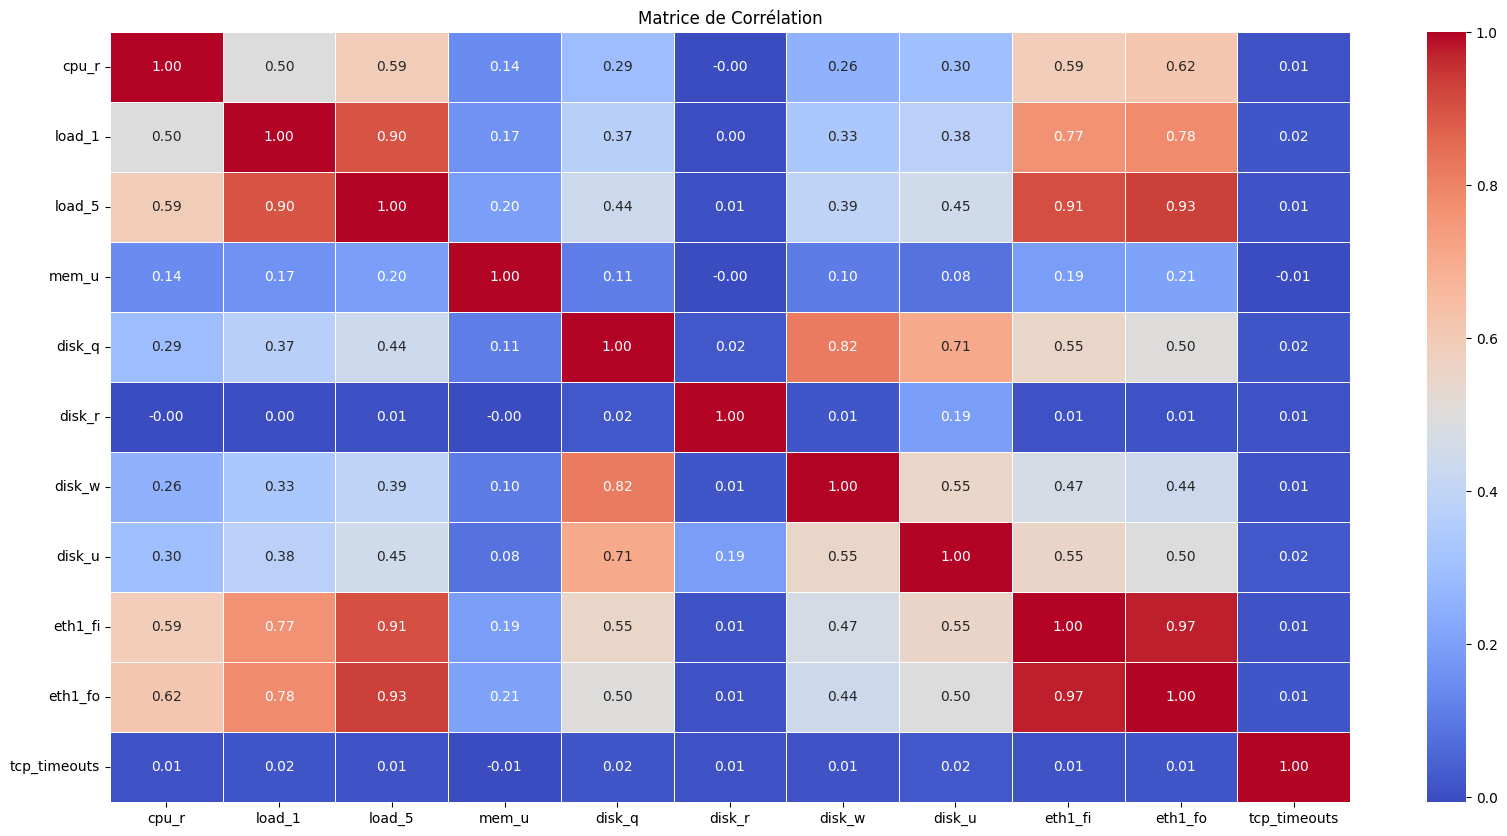

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_train[[
     'cpu_r', 'load_1', 'load_5', 'mem_u','disk_q', 'disk_r', 'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo','tcp_timeouts'
]].corr()
plt.figure(figsize=(20, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [19]:
# columns to conserve 
priority_columns = [
    'timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 
    'disk_q', 'disk_r', 'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo','tcp_timeouts'
]

priority_columns_test = priority_columns + ['label']

missing_train = [col for col in priority_columns if col not in df_train.columns]
missing_test = [col for col in priority_columns_test if col not in df_test.columns]
if missing_train:
    raise ValueError(f"missing columns df_train : {missing_train}")
if missing_test:
    raise ValueError(f"missing columns df_test : {missing_test}")

df_train = df_train[priority_columns]
df_test = df_test[priority_columns_test]

In [20]:
print("columns df train :")
print(df_train.columns)
print("columns df test :")
print(df_test.columns)

columns df train :
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 'disk_q', 'disk_r',
       'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts'],
      dtype='object')
columns df test :
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 'disk_q', 'disk_r',
       'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts', 'label'],
      dtype='object')


In [21]:
print("df_train :")
df_train.head()


df_train :


,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts
0,0,0.032258,0.039195,0.027871,0.915385,0.020011,0.000122,0.060266,0.027397,0.062195,0.041221,0.000045
1,1,0.043011,0.048729,0.033445,0.915385,0.019160,0.001722,0.054029,0.027397,0.051131,0.036651,0.000045
2,2,0.043011,0.034958,0.032330,0.915385,0.020011,0.000122,0.057157,0.027397,0.047139,0.035940,0.000045
3,3,0.032258,0.028602,0.030100,0.912821,0.021289,0.000000,0.058962,0.013699,0.055012,0.038168,0.000022
4,4,0.032258,0.019068,0.026756,0.912821,0.018734,0.000000,0.047945,0.013699,0.050170,0.037274,0.000034


In [22]:
print("df_test :")
df_test.head()

df_test :


,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts,label
0,0,0.075269,0.065678,0.070234,0.933333,0.031081,0.000000,0.067808,0.027397,0.121988,0.091978,0.000034,0.0
1,1,0.086022,0.080508,0.075808,0.930769,0.031081,0.000122,0.071395,0.054795,0.121396,0.094162,0.000022,0.0
2,2,0.075269,0.064619,0.071349,0.928205,0.030940,0.000366,0.063277,0.027397,0.115384,0.090118,0.000045,0.0
3,3,0.086022,0.048729,0.063545,0.928205,0.027250,0.000244,0.067841,0.027397,0.135121,0.097381,0.000034,0.0
4,4,0.086022,0.051907,0.062430,0.933333,0.030940,0.000244,0.075654,0.041096,0.127359,0.094495,0.000022,0.0


In [23]:
import pandas as pd

# save df_train
df_train.to_csv('machine-1-1_train_filtered.csv', index=False)


#save  df_test
df_test.to_csv('machine-1-1_test_filtered.csv', index=False)


In [24]:
df_train.shape

(28479, 12)

In [25]:
df_test.shape

(28479, 13)

In [23]:
df_test['label'].value_counts()

label
0.0    25785
1.0     2694
Name: count, dtype: int64

# Analyze anomaly intervals

Label distribution:
label
0.0    25785
1.0     2694
Name: count, dtype: int64


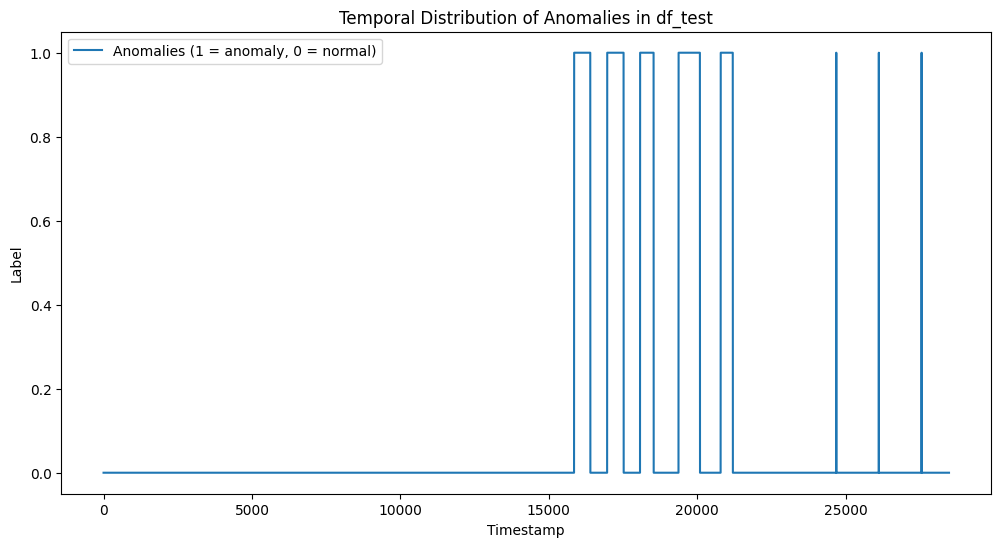

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered test dataset
test_data = 'machine-1-1_test_filtered.csv'
df_test = pd.read_csv(test_data)

# Check the distribution of anomaly labels (0 = normal, 1 = anomaly)
print("Label distribution:")
print(df_test['label'].value_counts())

# Visualize the temporal distribution of anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_test['timestamp'], df_test['label'], label='Anomalies (1 = anomaly, 0 = normal)')
plt.xlabel('Timestamp')
plt.ylabel('Label')
plt.title('Temporal Distribution of Anomalies in df_test')
plt.legend()
plt.show()



In [25]:
# Analyze anomalies over time intervals (e.g., every 1000 timestamps)
bins = range(0, df_test['timestamp'].max() + 1000, 1000)
df_test['time_bin'] = pd.cut(df_test['timestamp'], bins=bins)

# Count the number of anomalies within each interval
anomaly_counts = df_test.groupby('time_bin')['label'].sum()

print("\nNumber of anomalies per 1000-timestamp interval:")
print(anomaly_counts)



Number of anomalies per 1000-timestamp interval:
time_bin
(0, 1000]           0.0
(1000, 2000]        0.0
(2000, 3000]        0.0
(3000, 4000]        0.0
(4000, 5000]        0.0
(5000, 6000]        0.0
(6000, 7000]        0.0
(7000, 8000]        0.0
(8000, 9000]        0.0
(9000, 10000]       0.0
(10000, 11000]      0.0
(11000, 12000]      0.0
(12000, 13000]      0.0
(13000, 14000]      0.0
(14000, 15000]      0.0
(15000, 16000]    152.0
(16000, 17000]    432.0
(17000, 18000]    516.0
(18000, 19000]    457.0
(19000, 20000]    634.0
(20000, 21000]    302.0
(21000, 22000]    194.0
(22000, 23000]      0.0
(23000, 24000]      0.0
(24000, 25000]      3.0
(25000, 26000]      0.0
(26000, 27000]      2.0
(27000, 28000]      2.0
(28000, 29000]      0.0
Name: label, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_2296\1168435984.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anomaly_counts = df_test.groupby('time_bin')['label'].sum()


anomalies are in 15000-22000

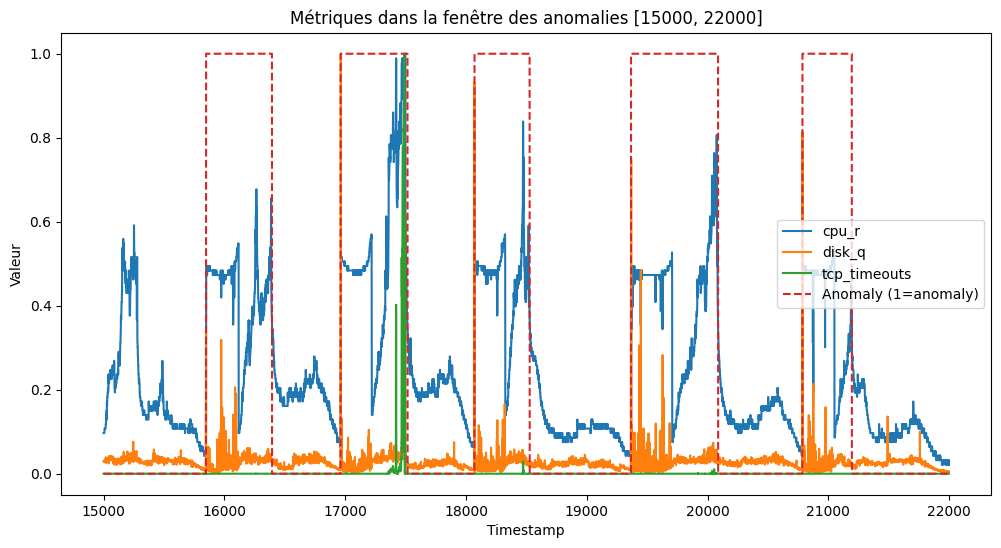

In [26]:
anomaly_window = df_test[(df_test['timestamp'] >= 15000) & (df_test['timestamp'] < 22000)]

plt.figure(figsize=(12, 6))
plt.plot(anomaly_window['timestamp'], anomaly_window['cpu_r'], label='cpu_r')
plt.plot(anomaly_window['timestamp'], anomaly_window['disk_q'], label='disk_q')
plt.plot(anomaly_window['timestamp'], anomaly_window['tcp_timeouts'], label='tcp_timeouts')
plt.plot(anomaly_window['timestamp'], anomaly_window['label'], label='Anomaly (1=anomaly)', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Valeur')
plt.title('Métriques dans la fenêtre des anomalies [15000, 22000]')
plt.legend()
plt.show()

**MLFLOW**

In [27]:
!pip install mlflow

  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.7 MB 8.4 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.7 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/24.7 MB 5.8 MB/s eta 0:00:04
   ----- ---------------------------------- 3.7/24.7 MB 5.2 MB/s eta 0:00:05
   ------- -------------------------------- 4.7/24.7 MB 5.2 MB/s eta 0:00:04
   -------- ------------------------------- 5.2/24.7 MB 4.8 MB/s eta 0:00:05
   ---------- ----------------------------- 6.3/24.7 MB 4.6 MB/s eta 0:00:05
   ----------- ---------------------------- 7.1/24.7 MB 4.5 MB/s eta 0:00:04
   ------------ --------------------------- 7.6/24.7 MB 4.3 MB/s eta 0:00:04
   -------------- ------------------------- 8.7/24.7 MB 4.3 MB/s eta 0:00:04
   --------------- ------------------------ 9.4/24.7 MB 4.3 MB/s eta 0:00:04
   ---------------- 

In [27]:
import mlflow
import mlflow.sklearn
import io
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


def log_model_to_mlflow(model_name, model, params, metrics, cm, model_artifact):
    with mlflow.start_run(run_name=model_name):
        mlflow.log_params(params)
        mlflow.log_metrics(metrics)

        # Sauvegarder le modèle
        mlflow.sklearn.log_model(sk_model=model_artifact, artifact_path=model_name)

        # Log confusion matrix image
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")

        # Convertir la figure matplotlib en image PIL
        plt.tight_layout()
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image.open(buf)
        mlflow.log_image(img, artifact_file="confusion_matrix.png")
        plt.close()



# classic and Simple unsupervised model

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

In [27]:
features = [ 'cpu_r', 'load_1', 'load_5', 'mem_u',
    'disk_q', 'disk_r', 'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts']

## isolation forest with grid search

In [31]:
from sklearn.ensemble import IsolationForest


X_train = df_train[features]
X_test = df_test[features]



In [32]:
contamination_values = np.arange(0.01, 0.16, 0.01)
results = []

for contamination in contamination_values:
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X_train)

    df_test['anomaly_pred'] = pd.Series(model.predict(X_test)).map({1: 0, -1: 1})

    precision = precision_score(df_test['label'], df_test['anomaly_pred'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['anomaly_pred'])
    f1 = f1_score(df_test['label'], df_test['anomaly_pred'])
    cm = confusion_matrix(df_test['label'], df_test['anomaly_pred'])

    # Log via MLflow
    log_model_to_mlflow(
        model_name="IsolationForest",
        model=model,
        params={"contamination": contamination},
        metrics={"precision": precision, "recall": recall, "f1_score": f1},
        cm=cm,
        model_artifact=model
    )

    results.append((contamination, precision, recall, f1))


2025/08/01 16:48:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 16:48:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/01 16:48:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 16:48:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/01 16:48:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 16:48:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/01 16:48:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

In [37]:
# Convert results into a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['contamination', 'precision', 'recall', 'f1_score'])

# Display rounded evaluation metrics
print("Grid Search Results:")
print(results_df.round(4))



Grid Search Results:
    contamination  precision  recall  f1_score
0            0.01     0.3785  0.5546    0.4499
1            0.02     0.3466  0.7108    0.4660
2            0.03     0.3268  0.7814    0.4608
3            0.04     0.3090  0.8307    0.4504
4            0.05     0.2916  0.8601    0.4356
5            0.06     0.2796  0.8838    0.4248
6            0.07     0.2691  0.9076    0.4151
7            0.08     0.2585  0.9276    0.4043
8            0.09     0.2487  0.9391    0.3933
9            0.10     0.2394  0.9495    0.3823
10           0.11     0.2307  0.9614    0.3720
11           0.12     0.2228  0.9677    0.3622
12           0.13     0.2149  0.9718    0.3519
13           0.14     0.2086  0.9748    0.3436
14           0.15     0.2020  0.9770    0.3348


In [38]:
# Identify the contamination value that gives the highest F1 score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_contamination = best_result['contamination']
print(f"\nBest contamination: {best_contamination:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")



Best contamination: 0.0200
Precision: 0.3466
Recall: 0.7108
F1-score: 0.4660



Confusion Matrix for the Best Contamination Value:
[[22175  3610]
 [  779  1915]]

Interpretation:
True Negatives (normal predicted as normal): 22175
False Positives (normal predicted as anomaly): 3610
False Negatives (anomaly predicted as normal): 779
True Positives (anomaly predicted as anomaly): 1915


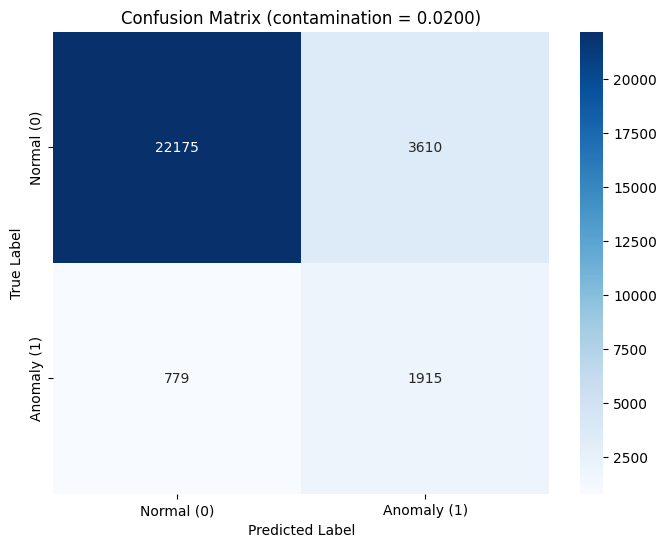

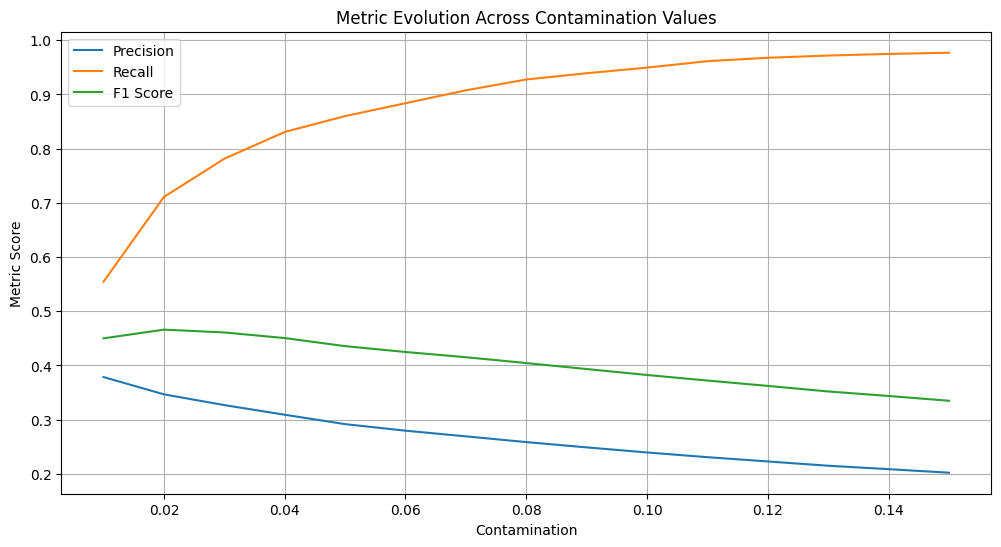

In [39]:
# Generate confusion matrix for the best model
model = IsolationForest(contamination=best_contamination, random_state=42)
model.fit(X_train)
df_test['anomaly_pred'] = model.predict(X_test)
df_test['anomaly_pred'] = df_test['anomaly_pred'].map({1: 0, -1: 1})

cm = confusion_matrix(df_test['label'], df_test['anomaly_pred'])

print("\nConfusion Matrix for the Best Contamination Value:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (contamination = {best_contamination:.4f})')
plt.show()

# Plot the evolution of precision, recall, and F1 score across contamination values
plt.figure(figsize=(12, 6))
plt.plot(results_df['contamination'], results_df['precision'], label='Precision')
plt.plot(results_df['contamination'], results_df['recall'], label='Recall')
plt.plot(results_df['contamination'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Contamination')
plt.ylabel('Metric Score')
plt.title('Metric Evolution Across Contamination Values')
plt.legend()
plt.grid(True)
plt.show()


## Z score

In [51]:
# Calculate Z-scores for each feature (standard score)
z_scores = np.abs((df_test[features] - df_test[features].mean()) / df_test[features].std())

# Define a range of threshold values to test (from 1.0 to 5.0 with a step of 0.1)
threshold_values = np.arange(1.0, 5.1, 0.1)

# List to store evaluation metrics for each threshold
results = []

# Grid Search over different Z-score thresholds
for threshold in threshold_values:
    df_test['Zscore_pred'] = (z_scores > threshold).any(axis=1).astype(int)

    precision = precision_score(df_test['label'], df_test['Zscore_pred'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['Zscore_pred'])
    f1 = f1_score(df_test['label'], df_test['Zscore_pred'])
    cm = confusion_matrix(df_test['label'], df_test['Zscore_pred'])

    log_model_to_mlflow(
        model_name="ZScoreThresholding",
        model=None,
        params={"threshold": threshold},
        metrics={"precision": precision, "recall": recall, "f1_score": f1},
        cm=cm,
        model_artifact=model
    )
    
    results.append((threshold, precision, recall, f1))



2025/08/01 17:34:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 17:34:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/01 17:34:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 17:34:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/01 17:34:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 17:34:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/01 17:34:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

In [52]:
results_df = pd.DataFrame(results, columns=['threshold', 'precision', 'recall', 'f1_score'])

print("Grid Search Results (Z-score):")
print(results_df.round(4))

best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_threshold = best_result['threshold']
print(f"\nBest threshold: {best_threshold:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")

Grid Search Results (Z-score):
    threshold  precision  recall  f1_score
0         1.0     0.1842  0.9365    0.3078
1         1.1     0.2330  0.9280    0.3725
2         1.2     0.2957  0.9209    0.4476
3         1.3     0.3402  0.9131    0.4957
4         1.4     0.3807  0.9005    0.5352
5         1.5     0.4084  0.8898    0.5599
6         1.6     0.4307  0.8816    0.5787
7         1.7     0.4506  0.8701    0.5937
8         1.8     0.4693  0.8589    0.6070
9         1.9     0.4907  0.8478    0.6216
10        2.0     0.5214  0.8352    0.6420
11        2.1     0.5638  0.8215    0.6687
12        2.2     0.5943  0.8129    0.6866
13        2.3     0.6234  0.7999    0.7007
14        2.4     0.6472  0.7866    0.7101
15        2.5     0.5590  0.4733    0.5126
16        2.6     0.5411  0.4053    0.4635
17        2.7     0.5435  0.3641    0.4361
18        2.8     0.6159  0.3215    0.4224
19        2.9     0.6234  0.3010    0.4060
20        3.0     0.6439  0.2832    0.3934
21        3.1     0.661


Confusion Matrix for Best Threshold:
[[24630  1155]
 [  575  2119]]

Interpretation:
True Negatives (normal predicted as normal): 24630
False Positives (normal predicted as anomaly): 1155
False Negatives (anomaly predicted as normal): 575
True Positives (anomaly predicted as anomaly): 2119


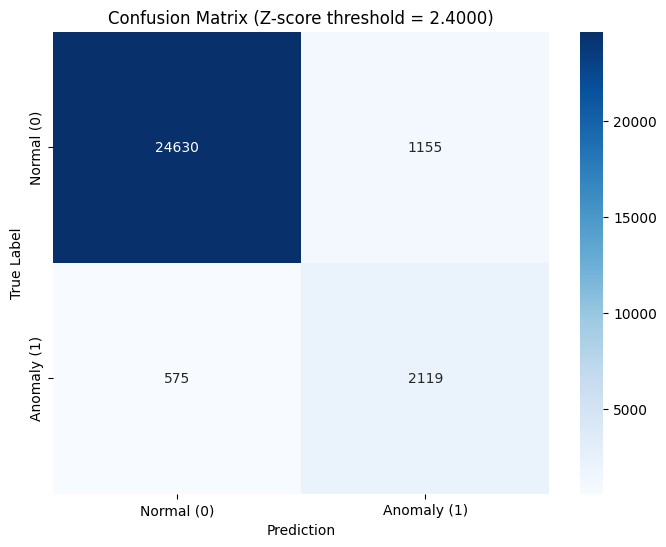

In [53]:
# Generate confusion matrix using the best threshold
df_test['Zscore_pred'] = (z_scores > best_threshold).any(axis=1).astype(int)
cm = confusion_matrix(df_test['label'], df_test['Zscore_pred'])

print("\nConfusion Matrix for Best Threshold:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Z-score threshold = {best_threshold:.4f})')
plt.show()


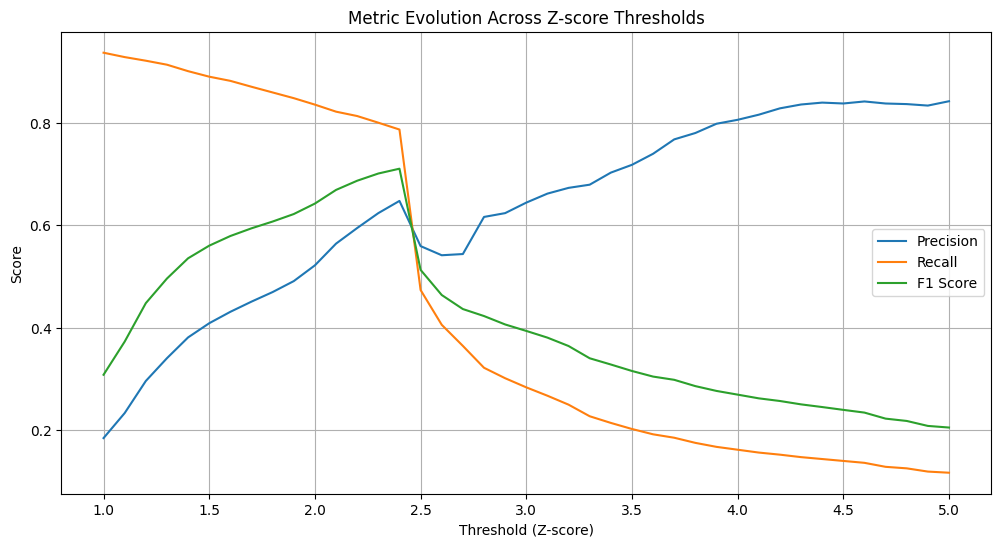

In [54]:
# Plot the evolution of precision, recall, and F1 score over different thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.plot(results_df['threshold'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Threshold (Z-score)')
plt.ylabel('Score')
plt.title('Metric Evolution Across Z-score Thresholds')
plt.legend()
plt.grid(True)
plt.show()


## Z score Robust with MAD

In [ ]:
# Calculate the median and MAD (Median Absolute Deviation) for each feature
median = df_test[features].median()
mad = df_test[features].apply(lambda x: np.median(np.abs(x - np.median(x))))
c = 1.4826  # Normalization constant for MAD (approximate for normal distribution)
mad[mad == 0] = np.finfo(float).eps  # Replace zeros to avoid division by zero

# Calculate robust Z-scores using median and MAD
z_robust = df_test[features].apply(lambda x: np.abs(x - median[x.name]) / (c * mad[x.name]))

# Define the range of thresholds to test
threshold_values = np.arange(1.0, 10.1, 0.5)  # From 1.0 to 10.0 in steps of 0.5

# Initialize a list to store evaluation results
results = []

# Perform grid search over threshold values
for threshold in threshold_values:
    # Detect anomalies: flag samples where any feature's robust Z-score exceeds the threshold
    df_test['z_robust'] = (z_robust > threshold).any(axis=1).astype(int)
    
    # Calculate evaluation metrics
    precision = precision_score(df_test['label'], df_test['z_robust'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['z_robust'])
    f1 = f1_score(df_test['label'], df_test['z_robust'])
    
    # Append the metrics for the current threshold
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Convert results list into a DataFrame for easier analysis
results_df = pd.DataFrame(results)

In [ ]:

# Display the grid search results for robust Z-score thresholds
print("Grid Search Results (Robust Z-score with MAD):")
print(results_df.round(4))

# Identify the best threshold based on highest F1 score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_threshold = best_result['threshold']
print(f"\nBest threshold: {best_threshold:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")

In [ ]:

# Compute confusion matrix for the best threshold
df_test['z_robust'] = (z_robust > best_threshold).any(axis=1).astype(int)
cm = confusion_matrix(df_test['label'], df_test['z_robust'])

print("\nConfusion Matrix for Best Threshold:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Robust Z-score, threshold={best_threshold:.4f})')
plt.show()

# Plot the evolution of precision, recall, and F1 score over different thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.plot(results_df['threshold'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Threshold (Robust Z-score)')
plt.ylabel('Score')
plt.title('Metric Evolution Across Robust Z-score Thresholds')
plt.legend()
plt.grid(True)
plt.show()


# IQR

In [55]:
# 1. Calculate IQR bounds
Q1 = df_test[features].quantile(0.25)
Q3 = df_test[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Predictions
df_test['IQR_pred'] = ((df_test[features] < lower_bound) | (df_test[features] > upper_bound)).any(axis=1).astype(int)

# 3. Evaluation
precision = precision_score(df_test['label'], df_test['IQR_pred'], zero_division=0)
recall = recall_score(df_test['label'], df_test['IQR_pred'])
f1 = f1_score(df_test['label'], df_test['IQR_pred'])
cm = confusion_matrix(df_test['label'], df_test['IQR_pred'])

print("Confusion Matrix (IQR Method):")
print(cm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 4. Logging MLflow
log_model_to_mlflow(
    model_name="IQRThresholding",
    model=None,
    params={"method": "IQR", "iqr_multiplier": 1.5},
    metrics={"precision": precision, "recall": recall, "f1_score": f1},
    cm=cm,
    model_artifact=None
)


2025/08/01 17:42:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 17:42:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/08/01 17:42:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Confusion Matrix (IQR Method):
[[21934  3851]
 [  265  2429]]
Precision: 0.3868
Recall: 0.9016
F1-score: 0.5413


2025/08/01 17:42:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# ML Supervised Models

## Random Forest

only for machine learning supervised model we should balanced data with **class_weight = Balanced** 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Données
X_test = df_test[features]
y_test = df_test['label']
X_train_split, X_val, y_train_split, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Entraînement
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_split, y_train_split)
df_test['RF_pred'] = model.predict(X_test)

# Évaluation
precision = precision_score(df_test['label'], df_test['RF_pred'])
recall = recall_score(df_test['label'], df_test['RF_pred'])
f1 = f1_score(df_test['label'], df_test['RF_pred'])
cm = confusion_matrix(df_test['label'], df_test['RF_pred'])

print("Matrice de confusion (Random Forest) :")
print(cm)
print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"F1-score : {f1}")

# Log dans MLflow
log_model_to_mlflow(
    model_name="RandomForestClassifier",
    model=model,
    params={"class_weight": "balanced", "random_state": 42},
    metrics={"precision": precision, "recall": recall, "f1_score": f1},
    cm=cm,
    model_artifact=model
)


2025/08/01 17:47:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Matrice de confusion (Random Forest) :
[[25755    30]
 [  126  2568]]
Précision : 0.9884526558891455
Rappel : 0.9532293986636972
F1-score : 0.9705215419501134


2025/08/01 17:47:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [63]:
import joblib
joblib.dump(model, 'rf_metric_detector.pkl')


['rf_metric_detector.pkl']

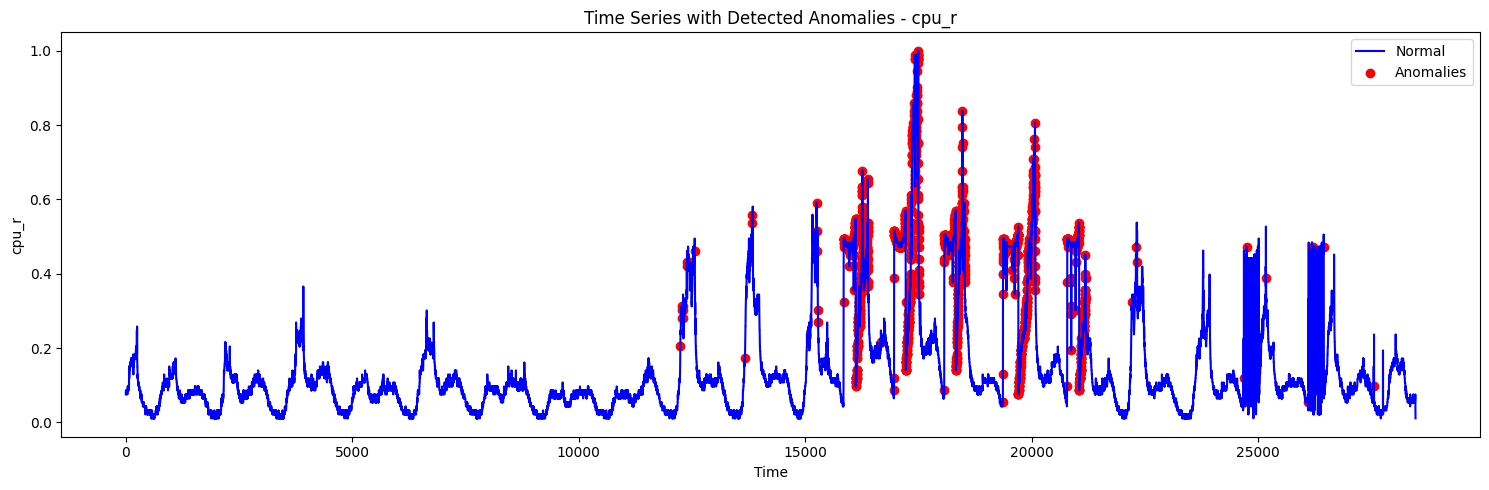

In [57]:
import matplotlib.pyplot as plt

feature_to_plot = 'cpu_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['RF_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


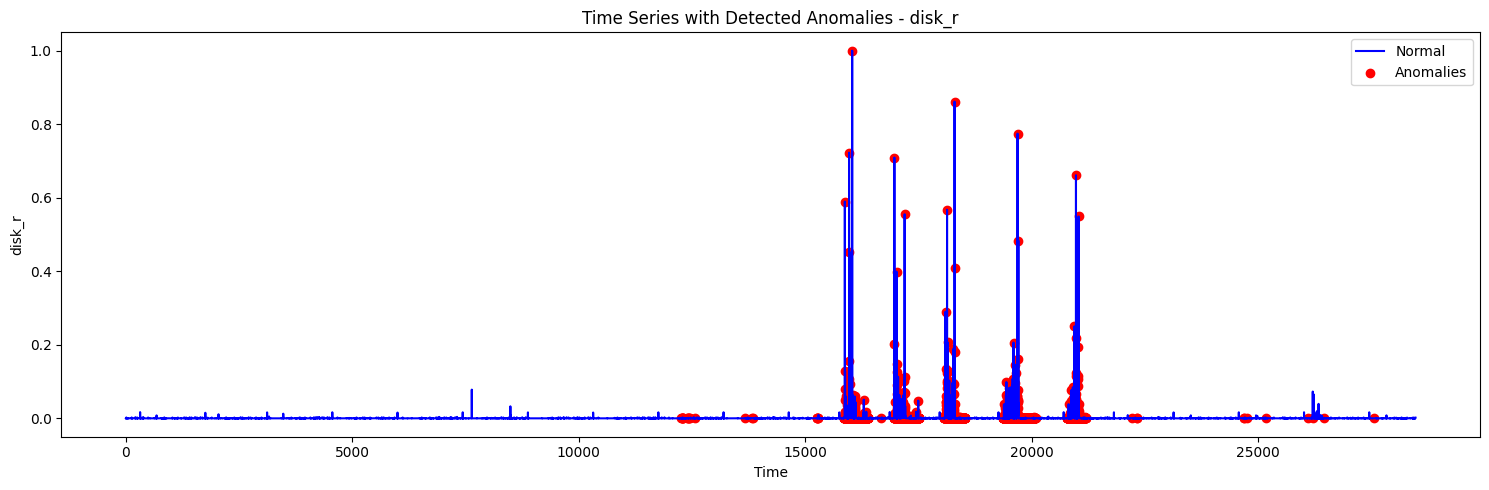

In [58]:
import matplotlib.pyplot as plt

feature_to_plot = 'disk_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['RF_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


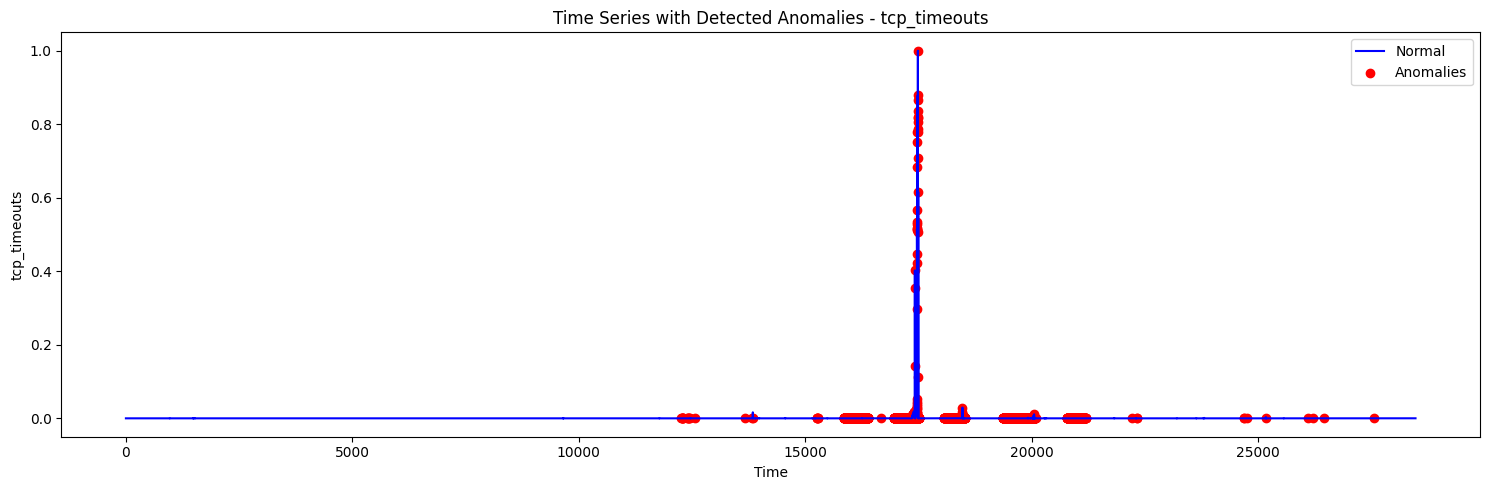

In [59]:
import matplotlib.pyplot as plt

feature_to_plot = 'tcp_timeouts'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['RF_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


## XGBClassifier

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1. Données
X_test = df_test[features]
y_test = df_test['label']
X_train_split, X_val, y_train_split, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# 2. Gérer le déséquilibre des classes
scale_pos_weight = (len(y_train_split) - sum(y_train_split)) / sum(y_train_split)

# 3. Initialiser le modèle XGBoost
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_split, y_train_split)

# 4. Prédictions
df_test['XGB_pred'] = model.predict(X_test)

# 5. Évaluation
precision = precision_score(df_test['label'], df_test['XGB_pred'])
recall = recall_score(df_test['label'], df_test['XGB_pred'])
f1 = f1_score(df_test['label'], df_test['XGB_pred'])
cm = confusion_matrix(df_test['label'], df_test['XGB_pred'])

print("Matrice de confusion (XGBoost) :")
print(cm)
print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"F1-score : {f1}")

# 6. Logging dans MLflow
log_model_to_mlflow(
    model_name="XGBoostClassifier",
    model=model,
    params={
        "scale_pos_weight": scale_pos_weight,
        "random_state": 42
    },
    metrics={
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    },
    cm=cm,
    model_artifact=model
)


c:\Users\pc\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/08/01 17:52:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 17:52:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Matrice de confusion (XGBoost) :
[[25478   307]
 [   62  2632]]
Précision : 0.8955427015991834
Rappel : 0.9769858945805494
F1-score : 0.9344931652760519


2025/08/01 17:52:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


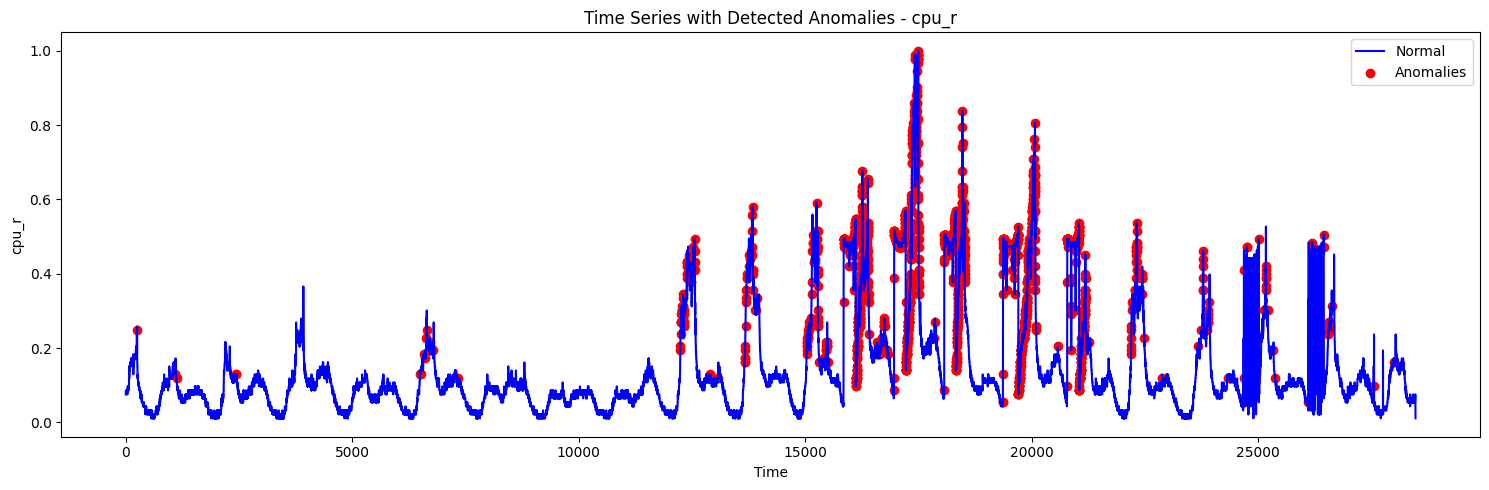

In [61]:
import matplotlib.pyplot as plt

feature_to_plot = 'cpu_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['XGB_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


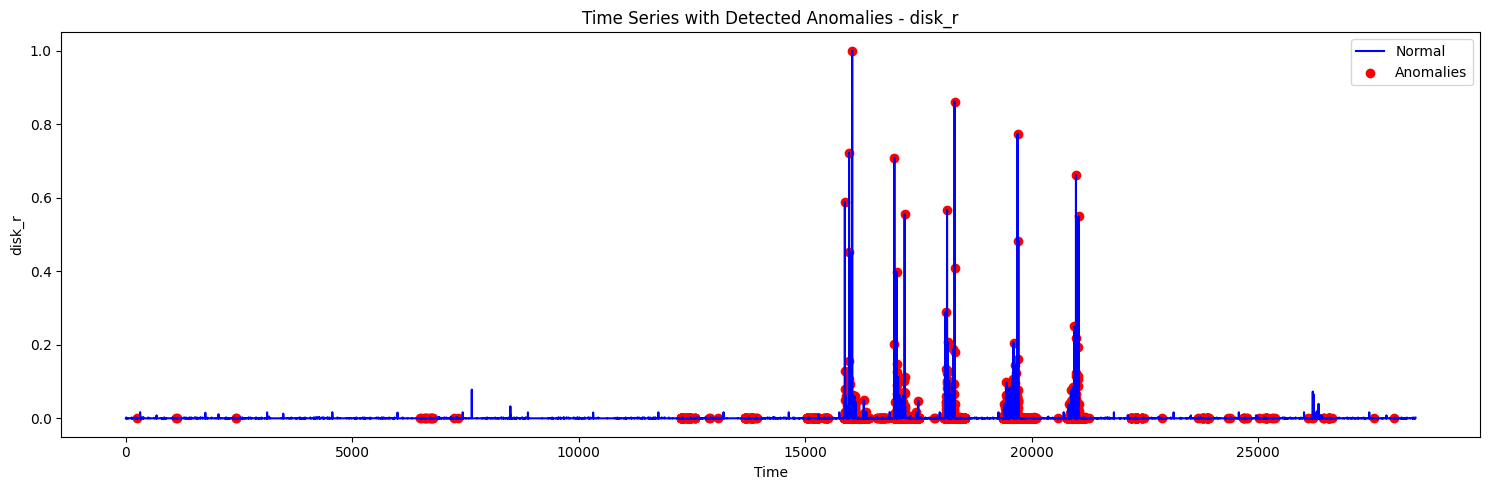

In [62]:
import matplotlib.pyplot as plt

feature_to_plot = 'disk_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['XGB_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


# Unsupervised neural network 

## verify normalization

In [64]:
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages for cleaner output

# Function to check normalization of a given dataset
def check_normalization(df, dataset_name):
    print(f"\nNormalization analysis for {dataset_name} :")
    
    # Descriptive statistics of the selected features
    stats = df[features].describe()
    print("\nDescriptive statistics:")
    print(stats.round(4))
    
    # Check if data is Min-Max scaled (within [0, 1] or [-1, 1])
    min_values = stats.loc['min']
    max_values = stats.loc['max']
    if (min_values >= 0).all() and (max_values <= 1).all():
        print("\nData appears to be normalized using Min-Max Scaling ([0, 1] range).")
    else:
        print("\nData appears to be normalized using Min-Max Scaling ([-1, 1] range).")
    
    # Check if data is standardized (mean ≈ 0 and std ≈ 1)
    mean_values = stats.loc['mean']
    std_values = stats.loc['std']
    if (mean_values.abs() < 0.1).all() and ((std_values > 0.9) & (std_values < 1.1)).all():
        print("\nData appears to be standardized (mean ≈ 0, std ≈ 1).")
    
    # Visualization: histograms for each feature
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(4, 4, i)
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.suptitle(f"Feature histograms for {dataset_name}", y=1.02)
    plt.show()
    
    # Visualization: boxplots to observe data distribution and outliers
    plt.figure(figsize=(15, 6))
    df[features].boxplot()
    plt.title(f"Feature boxplots for {dataset_name}")
    plt.xticks(rotation=45)
    plt.show()


Normalization analysis for df_train :

Descriptive statistics:
            cpu_r      load_1      load_5       mem_u      disk_q      disk_r  \
count  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000   
mean       0.0642      0.0569      0.0535      0.9136      0.0203      0.0002   
std        0.0567      0.0425      0.0377      0.0380      0.0100      0.0013   
min        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
25%        0.0323      0.0275      0.0279      0.9077      0.0123      0.0000   
50%        0.0430      0.0456      0.0424      0.9128      0.0210      0.0000   
75%        0.0860      0.0752      0.0702      0.9205      0.0280      0.0001   
max        0.4946      0.4216      0.2787      1.0000      0.1181      0.1404   

           disk_w      disk_u     eth1_fi     eth1_fo  tcp_timeouts  
count  28479.0000  28479.0000  28479.0000  28479.0000    28479.0000  
mean       0.0512      0.0266      0.0804      0.0619        0.000

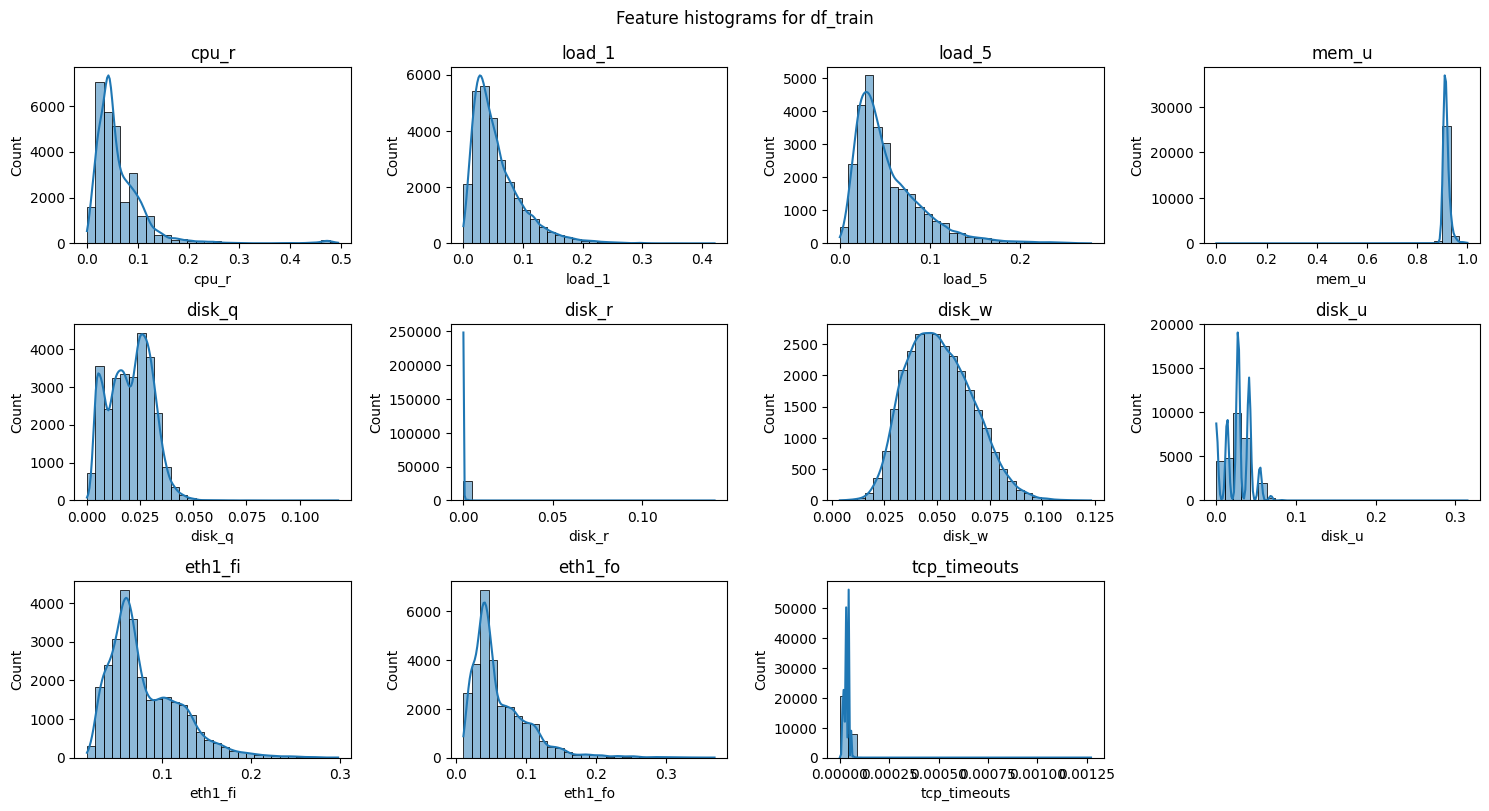

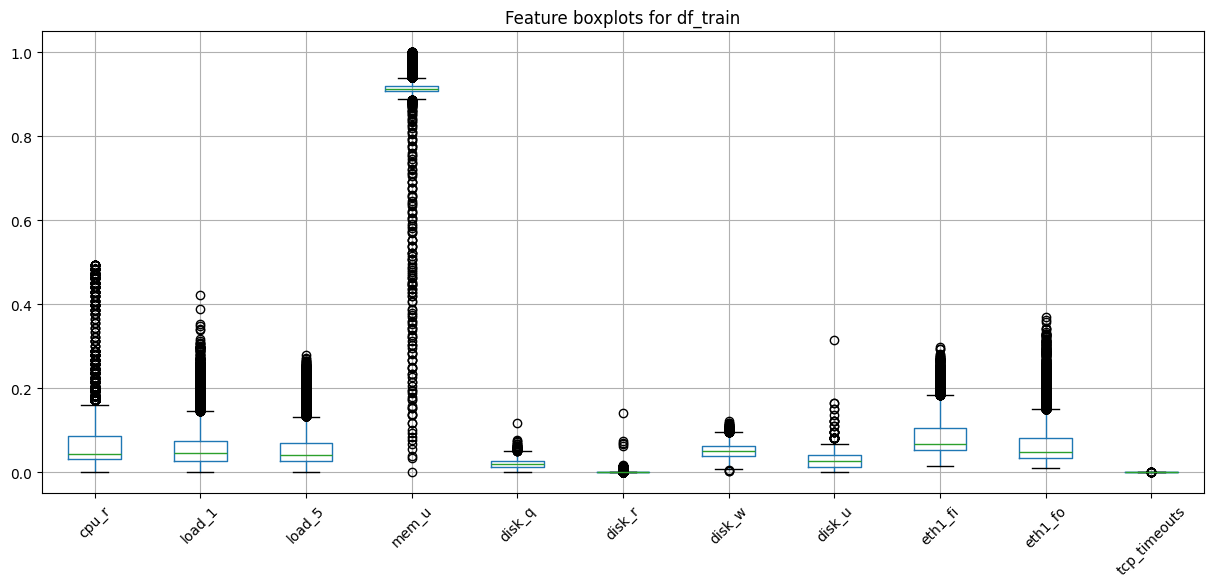


Normalization analysis for df_test :

Descriptive statistics:
            cpu_r      load_1      load_5       mem_u      disk_q      disk_r  \
count  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000   
mean       0.1452      0.1083      0.1079      0.9158      0.0238      0.0010   
std        0.1362      0.1022      0.1021      0.0307      0.0197      0.0157   
min        0.0108      0.0000      0.0022      0.1077      0.0000      0.0000   
25%        0.0645      0.0477      0.0502      0.8974      0.0136      0.0000   
50%        0.0968      0.0794      0.0803      0.9077      0.0243      0.0001   
75%        0.1613      0.1314      0.1204      0.9256      0.0312      0.0002   
max        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   

           disk_w      disk_u     eth1_fi     eth1_fo  tcp_timeouts  
count  28479.0000  28479.0000  28479.0000  28479.0000    28479.0000  
mean       0.0556      0.0303      0.1287      0.1219        0.0007

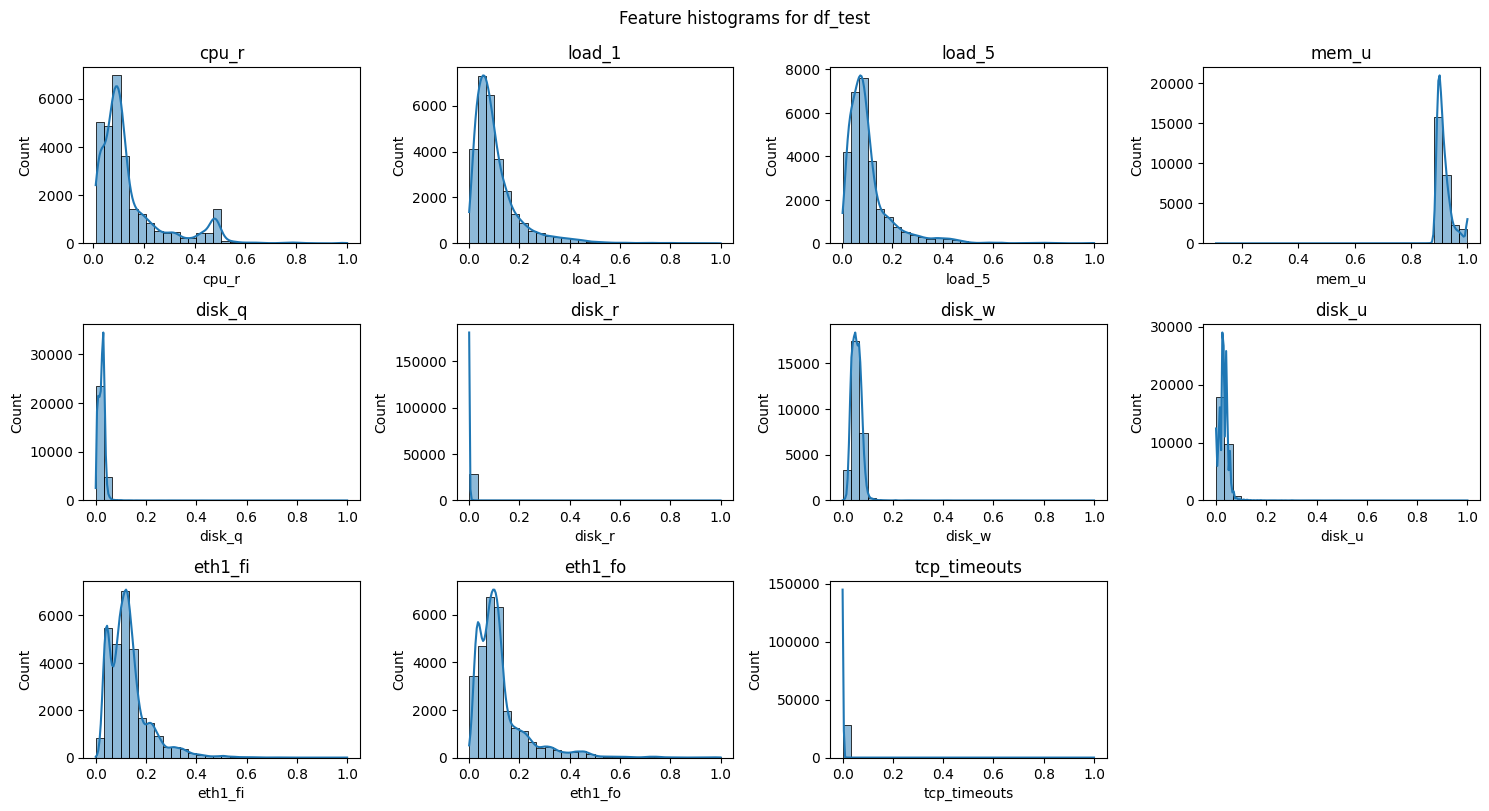

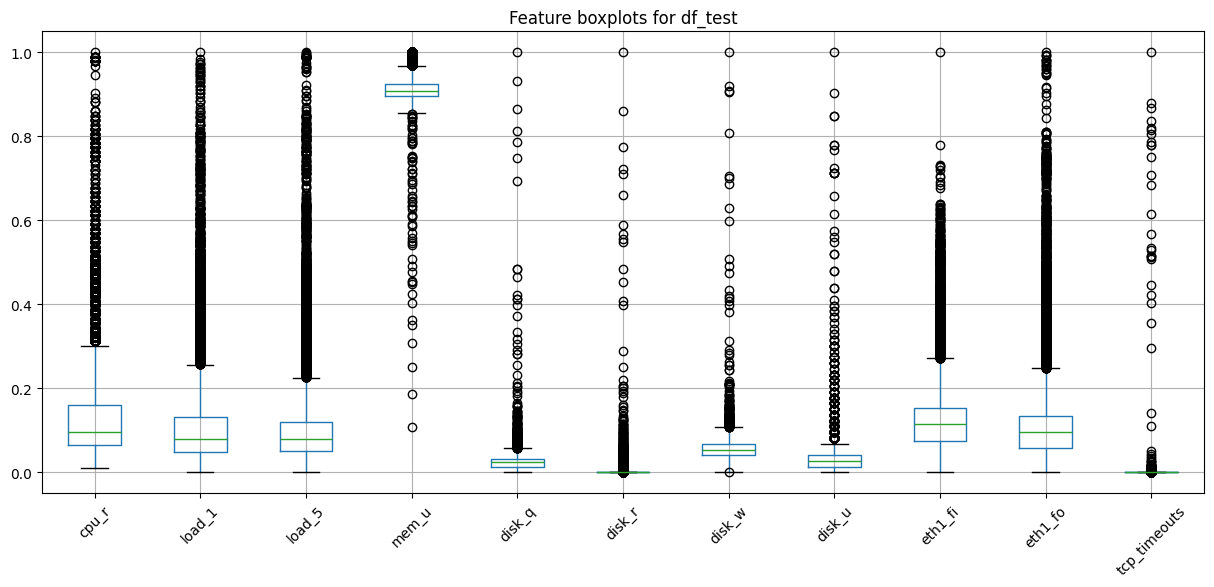


Comparison of feature ranges between df_train and df_test:

Range (max - min) for df_train:
cpu_r           0.4946
load_1          0.4216
load_5          0.2787
mem_u           1.0000
disk_q          0.1181
disk_r          0.1404
disk_w          0.1192
disk_u          0.3151
eth1_fi         0.2821
eth1_fo         0.3595
tcp_timeouts    0.0013
dtype: float64

Range (max - min) for df_test:
cpu_r           0.9892
load_1          1.0000
load_5          0.9978
mem_u           0.8923
disk_q          1.0000
disk_r          1.0000
disk_w          1.0000
disk_u          1.0000
eth1_fi         1.0000
eth1_fo         1.0000
tcp_timeouts    1.0000
dtype: float64


In [65]:
# Check normalization for both training and test datasets
check_normalization(df_train, "df_train")
check_normalization(df_test, "df_test")

# Compare feature value ranges between train and test datasets
print("\nComparison of feature ranges between df_train and df_test:")
train_range = df_train[features].max() - df_train[features].min()
test_range = df_test[features].max() - df_test[features].min()
print("\nRange (max - min) for df_train:")
print(train_range.round(4))
print("\nRange (max - min) for df_test:")
print(test_range.round(4))


In [26]:
import mlflow
import mlflow.keras
import io
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def log_keras_model_to_mlflow(model_name, model, params, metrics, cm):
    with mlflow.start_run(run_name=model_name):
        mlflow.log_params(params)

        # Logger uniquement les métriques scalaires (float)
        scalar_metrics = {k: v for k, v in metrics.items() if not isinstance(v, (list, tuple, np.ndarray))}
        mlflow.log_metrics(scalar_metrics)

        # Sauvegarder le modèle Keras
        mlflow.keras.log_model(keras_model=model, artifact_path=model_name)

        # Logger la matrice de confusion si disponible
        if cm is not None:
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title("Confusion Matrix")
            plt.tight_layout()
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            img = Image.open(buf)
            mlflow.log_image(img, artifact_file="confusion_matrix.png")
            plt.close()

        # Logger les courbes loss et val_loss si elles existent dans metrics
        if 'loss' in metrics and 'val_loss' in metrics:
            plt.figure(figsize=(8,5))
            plt.plot(metrics['loss'], label='train_loss')
            plt.plot(metrics['val_loss'], label='val_loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Training Loss Curve')
            plt.legend()
            plt.grid(True)
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            img = Image.open(buf)
            mlflow.log_image(img, artifact_file="loss_curve.png")
            plt.close()


## AutoEncoders

In [3]:
pip install tensorflow==2.18.0


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 1.3/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 2.6/390.3 MB 4.9 MB/s eta 0:01:20
   ---------------------------------------- 3.4/390.3 MB 4.6 MB/s eta 0:01:25
   ---------------------------------------- 3.9/390.3 MB 4.1 MB/s eta 0:01:34
   ---------------------------------------- 4.7/390.3 MB 4.2 MB/s eta 0:01:32
    --------------------------------------- 5.5/390.3 MB 4.1 MB/s eta 0:01:33
    --------------------------------------- 6.3/390.3 MB 4.0 MB/s eta 0:01:36
    --------------------------------------- 7.1/390.3 MB 4.1 MB/s eta 0:01:35
    --------------------------------------- 8.1/390.3 MB 4.1 MB/s eta 0:01:34
    --------------------------------------- 8.9/390.3 MB 4.1 MB/s eta 0:01:33
    --------------------------------------- 9.4/390.3 MB 4.1 MB/s eta 0

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
import mlflow
import mlflow.keras
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

X_train = df_train[features]
X_test = df_test[features]

model = Sequential([
    Dense(32, activation='relu', input_shape=(len(features),)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(features), activation='linear')
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, X_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Reconstruction des données
reconstructions = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)


Epoch 1/30


c:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0026 - val_loss: 8.9757e-05
Epoch 2/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9415e-05 - val_loss: 4.1967e-05
Epoch 3/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7513e-05 - val_loss: 2.3883e-05
Epoch 4/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8944e-05 - val_loss: 2.2043e-05
Epoch 5/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3321e-05 - val_loss: 1.3279e-05
Epoch 6/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8190e-06 - val_loss: 8.6713e-06
Epoch 7/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3491e-06 - val_loss: 6.2323e-06
Epoch 8/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5530e-06 - val_loss: 3.4548e-06
Epoch 9/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4587e-06 - val_loss: 3.1004e-06
Epoch 10/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0561e-06 - val_loss: 3.6825e-06
Epoch 11/30
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5973e-06 - 

In [32]:
percentile_values = np.arange(90, 99.1, 0.5)
results = []

with mlflow.start_run(run_name="AutoEncoder_GridSearch"):
    mlflow.log_params({
        "epochs": 30,
        "batch_size": 32,
        "model_type": "AutoEncoder"
    })

    for percentile in percentile_values:
        threshold = np.percentile(mse, percentile)
        df_test['anomaly_pred'] = (mse > threshold).astype(int)

        precision = precision_score(df_test['label'], df_test['anomaly_pred'], zero_division=0)
        recall = recall_score(df_test['label'], df_test['anomaly_pred'])
        f1 = f1_score(df_test['label'], df_test['anomaly_pred'])
        cm = confusion_matrix(df_test['label'], df_test['anomaly_pred'])

        # Logger les métriques dans MLflow
        mlflow.log_metrics({
            f"precision_{percentile}": precision,
            f"recall_{percentile}": recall,
            f"f1_score_{percentile}": f1
        })

        results.append({
            'percentile': percentile,
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

    # Log du modèle Keras
    mlflow.keras.log_model(model, "model")

    # Log des courbes de loss
    for i, loss in enumerate(history.history['loss']):
        mlflow.log_metric("loss", loss, step=i)
    for i, val_loss in enumerate(history.history['val_loss']):
        mlflow.log_metric("val_loss", val_loss, step=i)


2025/08/01 18:26:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 18:26:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/08/01 18:26:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


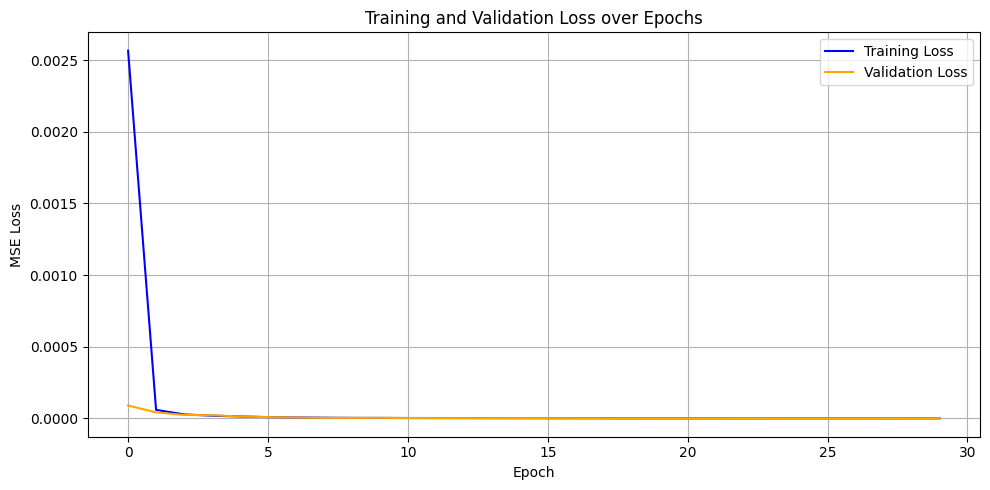

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Predict reconstructions for the test set
reconstructions = model.predict(X_test)

# Compute the reconstruction error (MSE) for each sample
mse = np.mean(np.square(reconstructions - X_test), axis=1)

890/890 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step


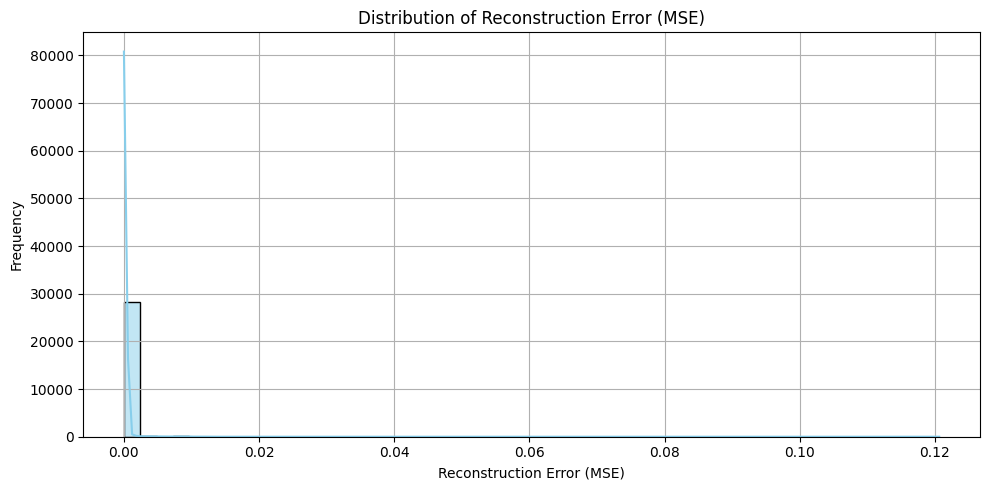

In [35]:
# Add MSE to the test DataFrame for reference (optional)
df_test['reconstruction_error'] = mse

# Plot the distribution of reconstruction error
plt.figure(figsize=(10, 5))
sns.histplot(mse, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Reconstruction Error (MSE)')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)
best_result = results_df.loc[results_df['f1_score'].idxmax()]
print("Best F1 Result:")
print(best_result)


In [37]:
results_df = pd.DataFrame(results)
best_result = results_df.loc[results_df['f1_score'].idxmax()]
print("Best F1 Result:")
print(best_result)

# Display the performance of each threshold
print("\nGrid Search Results (AutoEncoder):")
print(results_df.round(4))

# Identify the best threshold based on the highest F1-score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_percentile = best_result['percentile']
best_threshold = best_result['threshold']
print(f"\nBest percentile: {best_percentile:.2f}")
print(f"Best threshold (MSE): {best_threshold:.6f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")

Best F1 Result:
percentile    90.000000
threshold      0.000002
precision      0.671348
recall         0.709725
f1_score       0.690004
Name: 0, dtype: float64

Grid Search Results (AutoEncoder):
    percentile  threshold  precision  recall  f1_score
0         90.0     0.0000     0.6713  0.7097    0.6900
1         90.5     0.0000     0.6814  0.6845    0.6830
2         91.0     0.0000     0.6892  0.6559    0.6721
3         91.5     0.0000     0.6927  0.6225    0.6557
4         92.0     0.0000     0.6986  0.5909    0.6403
5         92.5     0.0000     0.7027  0.5572    0.6215
6         93.0     0.0000     0.7056  0.5223    0.6003
7         93.5     0.0000     0.7090  0.4874    0.5777
8         94.0     0.0000     0.7086  0.4495    0.5501
9         94.5     0.0000     0.7173  0.4172    0.5276
10        95.0     0.0000     0.7275  0.3846    0.5032
11        95.5     0.0000     0.7348  0.3497    0.4738
12        96.0     0.0001     0.7412  0.3137    0.4408
13        96.5     0.0001     0.75


Confusion Matrix (Best Threshold):
[[24849   936]
 [  782  1912]]

Interpretation:
True Negatives (normal predicted as normal): 24849
False Positives (normal predicted as anomaly): 936
False Negatives (anomaly predicted as normal): 782
True Positives (anomaly predicted as anomaly): 1912


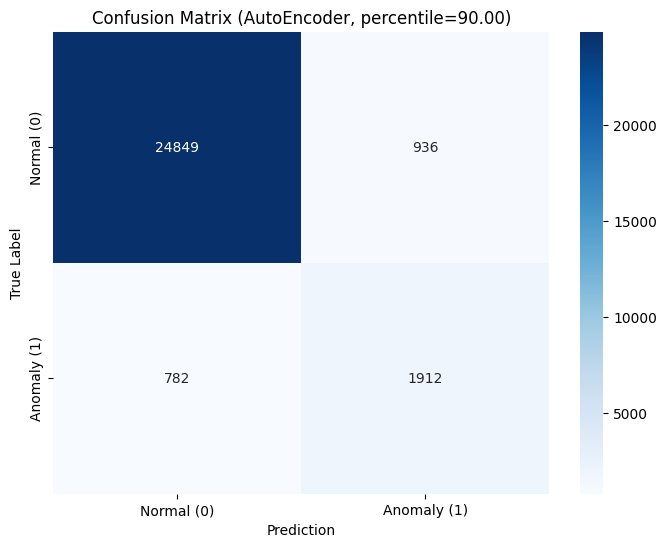

In [38]:
# Generate predictions using the best threshold
df_test['AE_pred'] = (mse > best_threshold).astype(int)

# Compute and display confusion matrix
cm = confusion_matrix(df_test['label'], df_test['AE_pred'])
print("\nConfusion Matrix (Best Threshold):")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (AutoEncoder, percentile={best_percentile:.2f})')
plt.show()



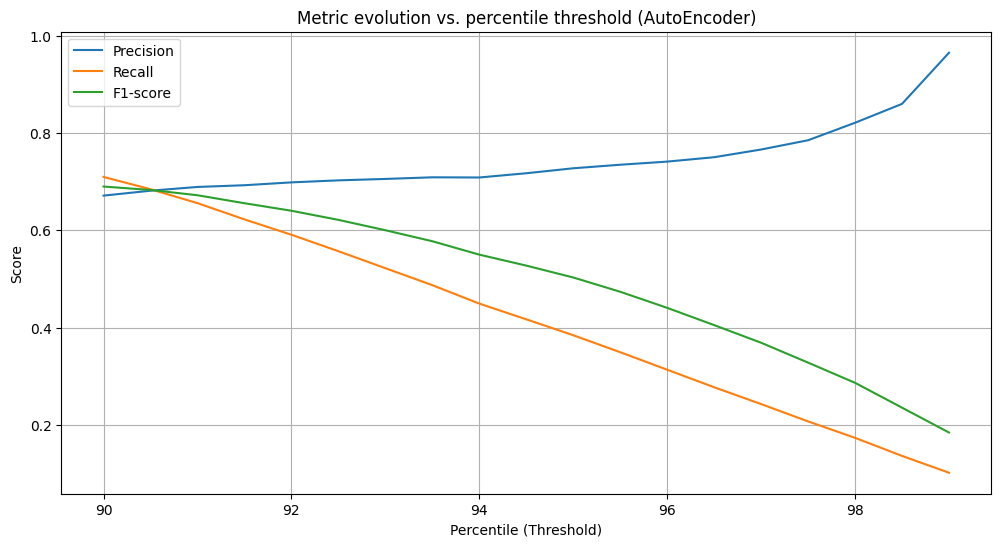

In [39]:
# Visualize how the metrics evolve with different thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['percentile'], results_df['precision'], label='Precision')
plt.plot(results_df['percentile'], results_df['recall'], label='Recall')
plt.plot(results_df['percentile'], results_df['f1_score'], label='F1-score')
plt.xlabel('Percentile (Threshold)')
plt.ylabel('Score')
plt.title('Metric evolution vs. percentile threshold (AutoEncoder)')
plt.legend()
plt.grid(True)
plt.show()


#### LSTM 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import BatchNormalization


In [41]:
# Custom data generator for time series data
class TimeSeriesGenerator(Sequence):
    def __init__(self, data, features, seq_length=50, step=10, batch_size=64):
        self.data = data[features].values
        self.seq_length = seq_length
        self.step = step
        self.batch_size = batch_size
        self.indices = np.arange(0, len(data) - seq_length + 1, step)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min(start + self.batch_size, len(self.indices))
        batch_indices = self.indices[start:end]
        
        # Create sequences of time steps
        sequences = np.array([self.data[i:i+self.seq_length] for i in batch_indices])
        
        # Flatten each sequence for reconstruction comparison
        sequences_flat = sequences.reshape(sequences.shape[0], -1)
        return sequences, sequences_flat

In [42]:
# Paramètres
seq_length = 40
step = 10
batch_size = 64

train_gen = TimeSeriesGenerator(df_train, features, seq_length, step, batch_size)
test_gen = TimeSeriesGenerator(df_test, features, seq_length, step, batch_size)

def create_lstm_model(units=256, input_shape=(seq_length, len(features)), dropout=0.5):
    model = Sequential([
        LSTM(units * 2, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(dropout),
        LSTM(units, activation='tanh', return_sequences=True),
        Dropout(dropout),
        LSTM(units // 2, activation='tanh'),
        Dropout(dropout),
        Dense(seq_length * len(features), activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

model = create_lstm_model()

c:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/35


c:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 - 25s - 552ms/step - loss: 0.0667 - val_loss: 0.0489
Epoch 2/35
45/45 - 19s - 425ms/step - loss: 0.0468 - val_loss: 0.0261
Epoch 3/35
45/45 - 18s - 406ms/step - loss: 0.0340 - val_loss: 0.0166
Epoch 4/35
45/45 - 17s - 372ms/step - loss: 0.0264 - val_loss: 0.0126
Epoch 5/35
45/45 - 17s - 382ms/step - loss: 0.0213 - val_loss: 0.0105
Epoch 6/35
45/45 - 16s - 366ms/step - loss: 0.0178 - val_loss: 0.0091
Epoch 7/35
45/45 - 17s - 380ms/step - loss: 0.0152 - val_loss: 0.0083
Epoch 8/35
45/45 - 17s - 380ms/step - loss: 0.0132 - val_loss: 0.0073
Epoch 9/35
45/45 - 17s - 381ms/step - loss: 0.0118 - val_loss: 0.0068
Epoch 10/35
45/45 - 17s - 387ms/step - loss: 0.0105 - val_loss: 0.0060
Epoch 11/35
45/45 - 16s - 362ms/step - loss: 0.0095 - val_loss: 0.0055
Epoch 12/35
45/45 - 16s - 363ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 13/35
45/45 - 17s - 368ms/step - loss: 0.0080 - val_loss: 0.0053
Epoch 14/35
45/45 - 17s - 375ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 15/35
45/45 - 18s - 

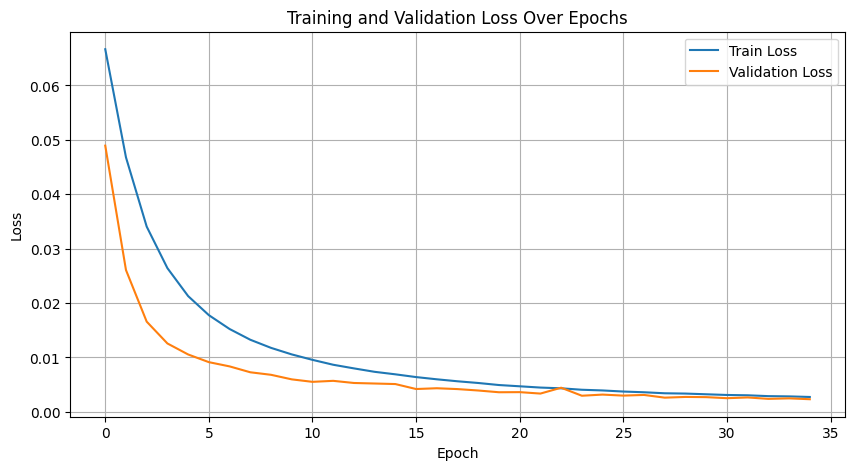

In [43]:
# Entraînement
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_gen, epochs=35, validation_data=test_gen, callbacks=[early_stop], verbose=2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


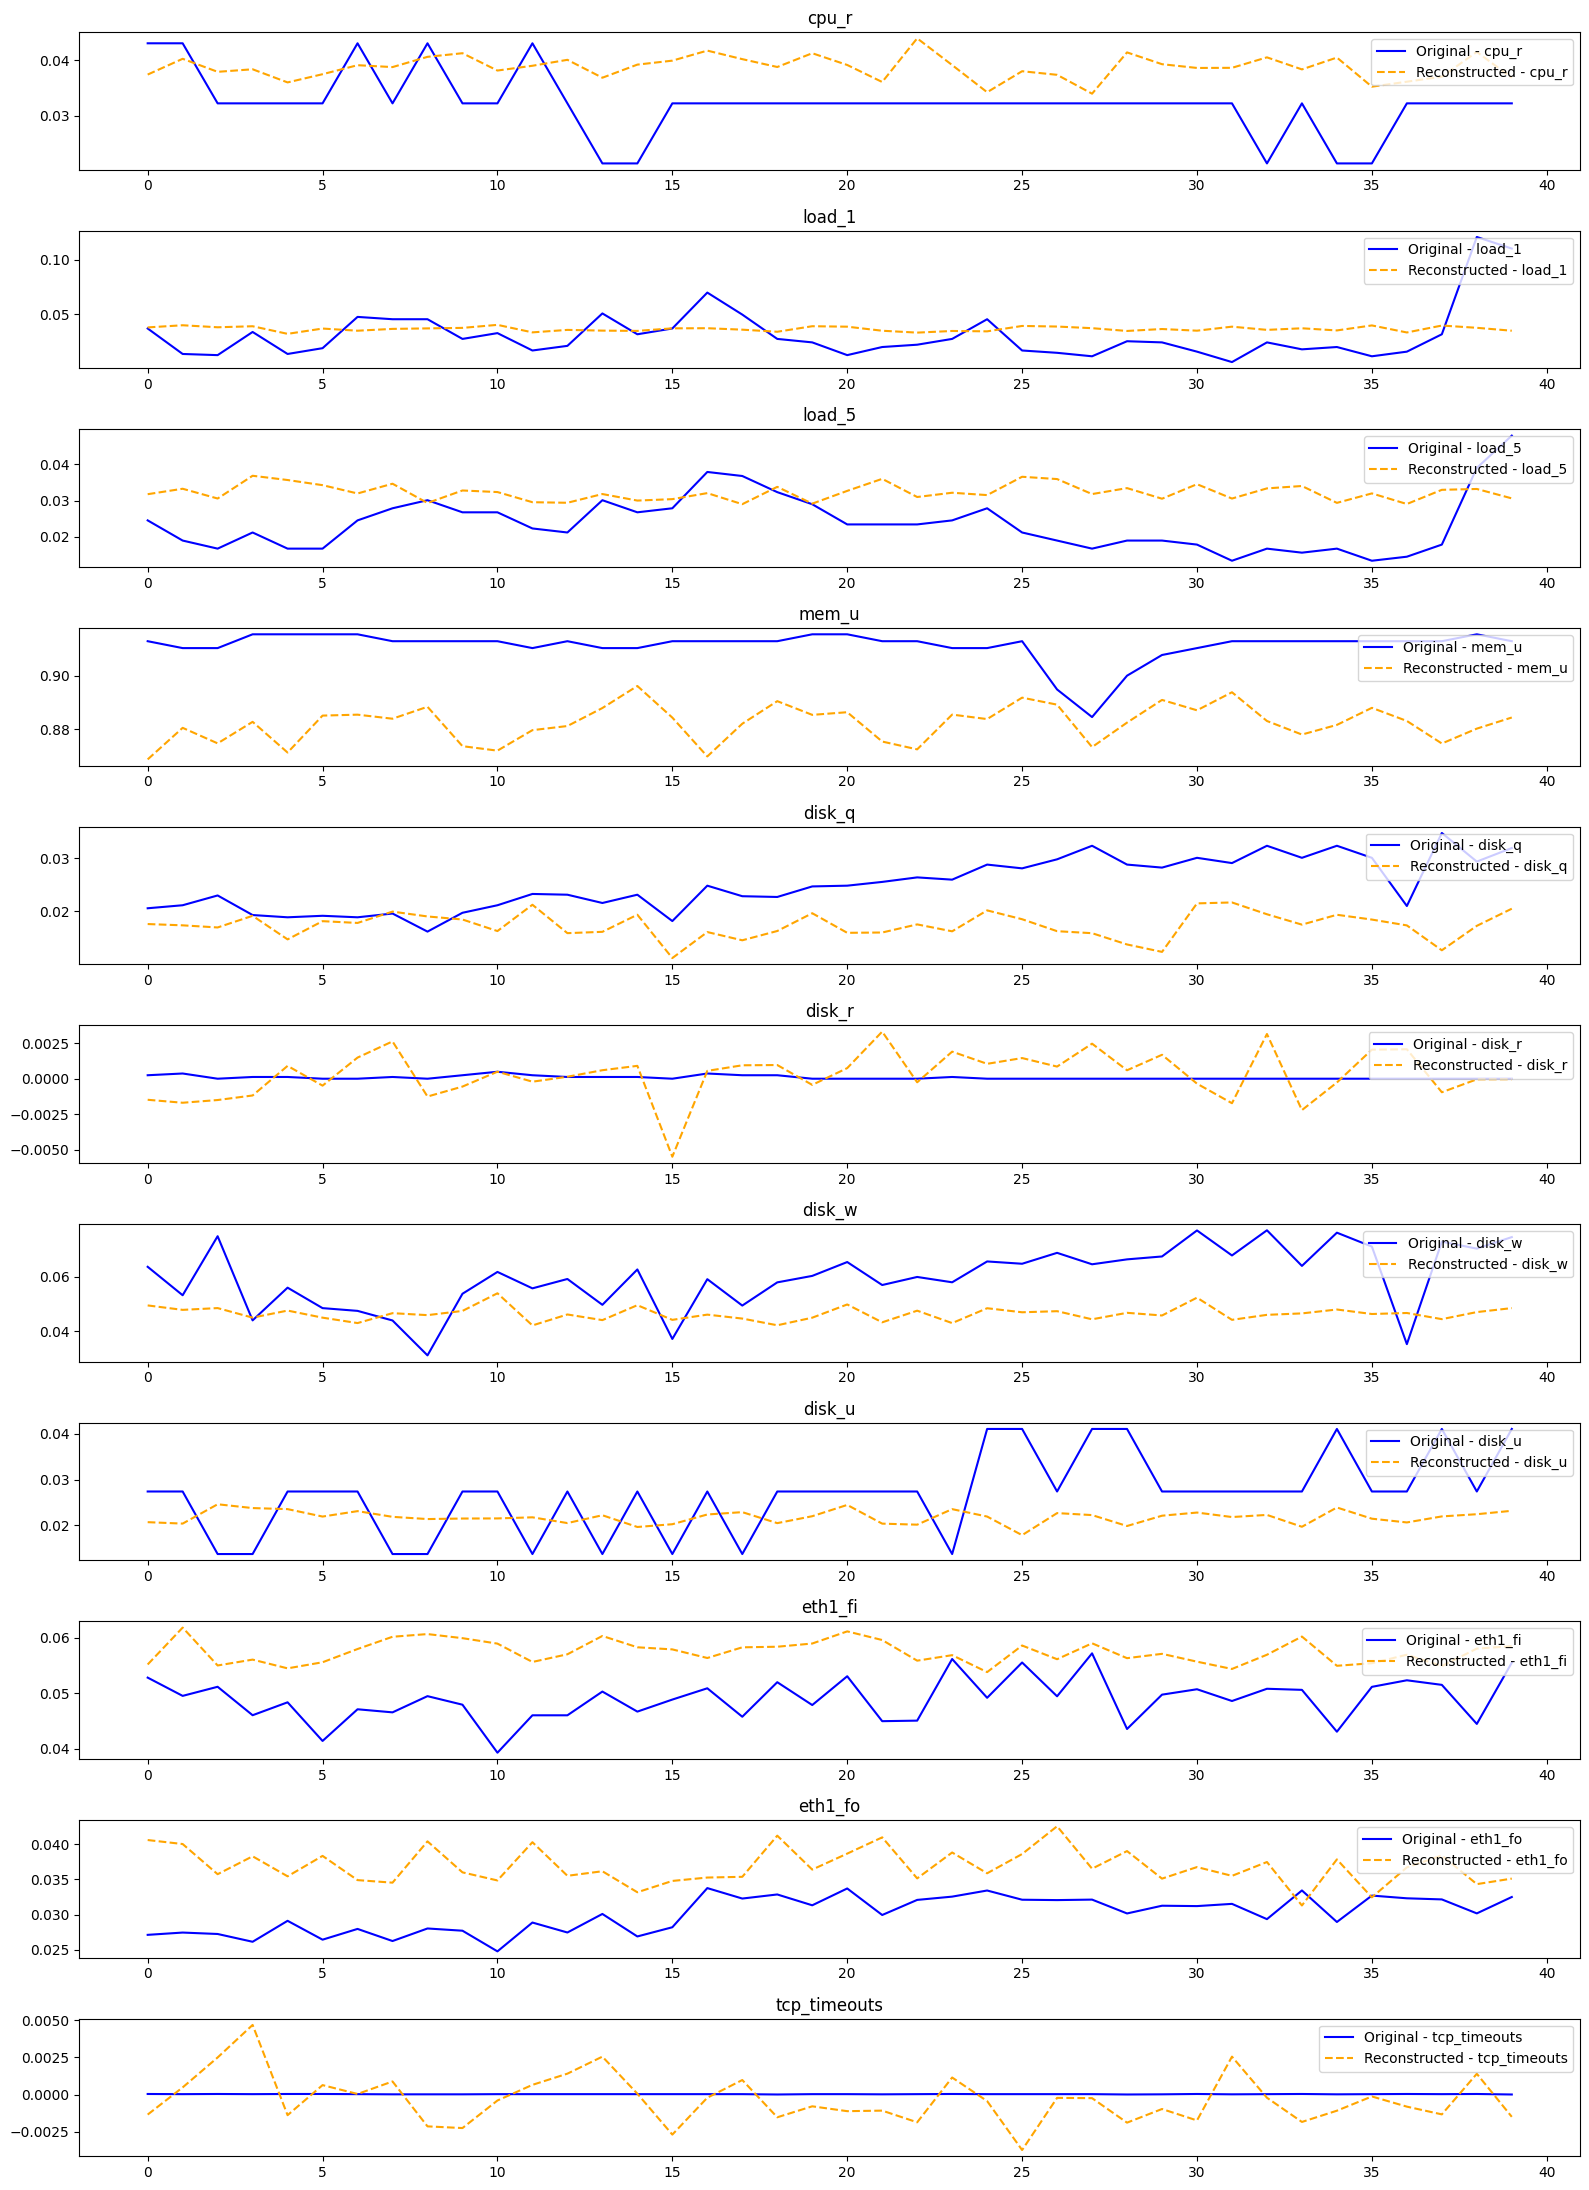

In [52]:
# Select a sequence from the training dataset
x_batch, x_flat = train_gen[5]  
sequence_index = 10  
sequence_original = x_batch[sequence_index] 

sequence_pred_flat = model.predict(np.expand_dims(sequence_original, axis=0), verbose=0)[0]  
# Output shape: (seq_length * number_of_features,)

sequence_pred = sequence_pred_flat.reshape(seq_length, len(features))  

#Plot original vs reconstructed values for each feature
plt.figure(figsize=(16, len(features) * 2))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    plt.plot(sequence_original[:, i], label=f'Original - {feature}', color='blue')
    plt.plot(sequence_pred[:, i], label=f'Reconstructed - {feature}', color='orange', linestyle='--')
    plt.title(feature)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


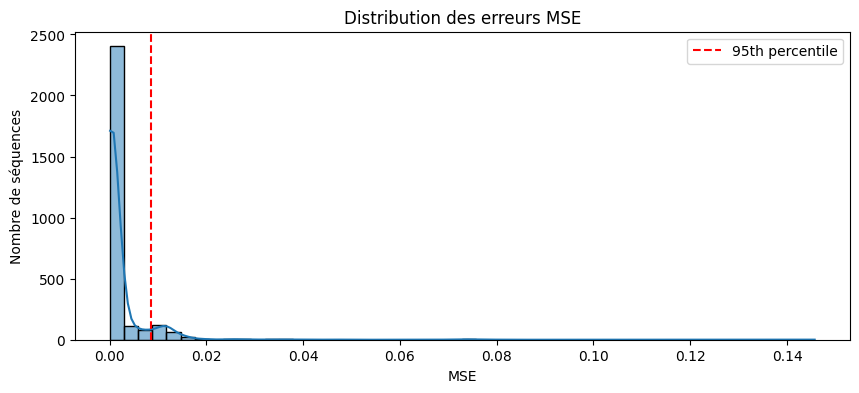

In [48]:
plt.figure(figsize=(10, 4))
sns.histplot(df_test_aligned['mse'], bins=50, kde=True)
plt.axvline(df_test_aligned['mse'].quantile(0.91), color='red', linestyle='--', label='95th percentile')
plt.title('Distribution des erreurs MSE')
plt.xlabel('MSE')
plt.ylabel('Nombre de séquences')
plt.legend()
plt.show()


Seuil optimal (max F1): 0.010689
Precision: 0.8578
Recall: 0.6729
F1-score: 0.7542
Matrice de confusion:
[[2545   30]
 [  88  181]]


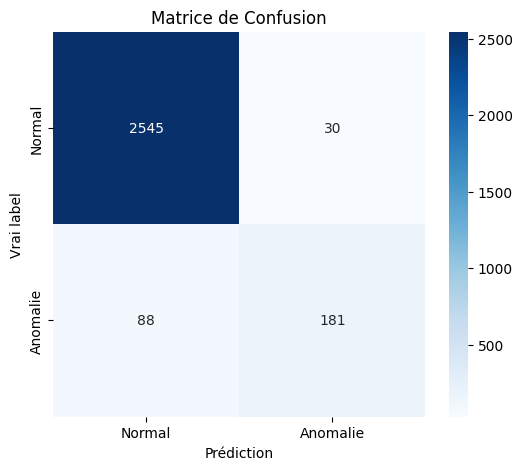

2025/08/01 19:00:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/01 19:00:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/08/01 19:00:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(df_test_aligned['label'], df_test_aligned['mse'])


f1_scores = 2 * precision * recall / (precision + recall + 1e-8)


best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Seuil optimal (max F1): {best_threshold:.6f}")

# Prédiction avec le meilleur seuil
df_test_aligned['LSTM_pred'] = (df_test_aligned['mse'] > best_threshold).astype(int)

# Évaluation
precision_final = precision_score(df_test_aligned['label'], df_test_aligned['LSTM_pred'], zero_division=0)
recall_final = recall_score(df_test_aligned['label'], df_test_aligned['LSTM_pred'])
f1_final = f1_score(df_test_aligned['label'], df_test_aligned['LSTM_pred'])
cm = confusion_matrix(df_test_aligned['label'], df_test_aligned['LSTM_pred'])

print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1-score: {f1_final:.4f}")
print("Matrice de confusion:")
print(cm)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomalie'],
            yticklabels=['Normal', 'Anomalie'])
plt.xlabel('Prédiction')
plt.ylabel('Vrai label')
plt.title('Matrice de Confusion')
plt.show()

mlflow.log_metrics({
    f"precision_{percentile}": precision_final,
    f"recall_{percentile}": recall_final,
    f"f1_score_{percentile}": f1_final
})


results.append({
'percentile': percentile,
'threshold': threshold,
'precision': precision,
'recall': recall,
'f1_score': f1
})

# Log du modèle Keras
mlflow.keras.log_model(model, "model LSTMAE")

# Log des courbes de loss

mlflow.log_metric("loss", history.history['loss'][-1])
mlflow.log_metric("val_loss", history.history['val_loss'][-1])


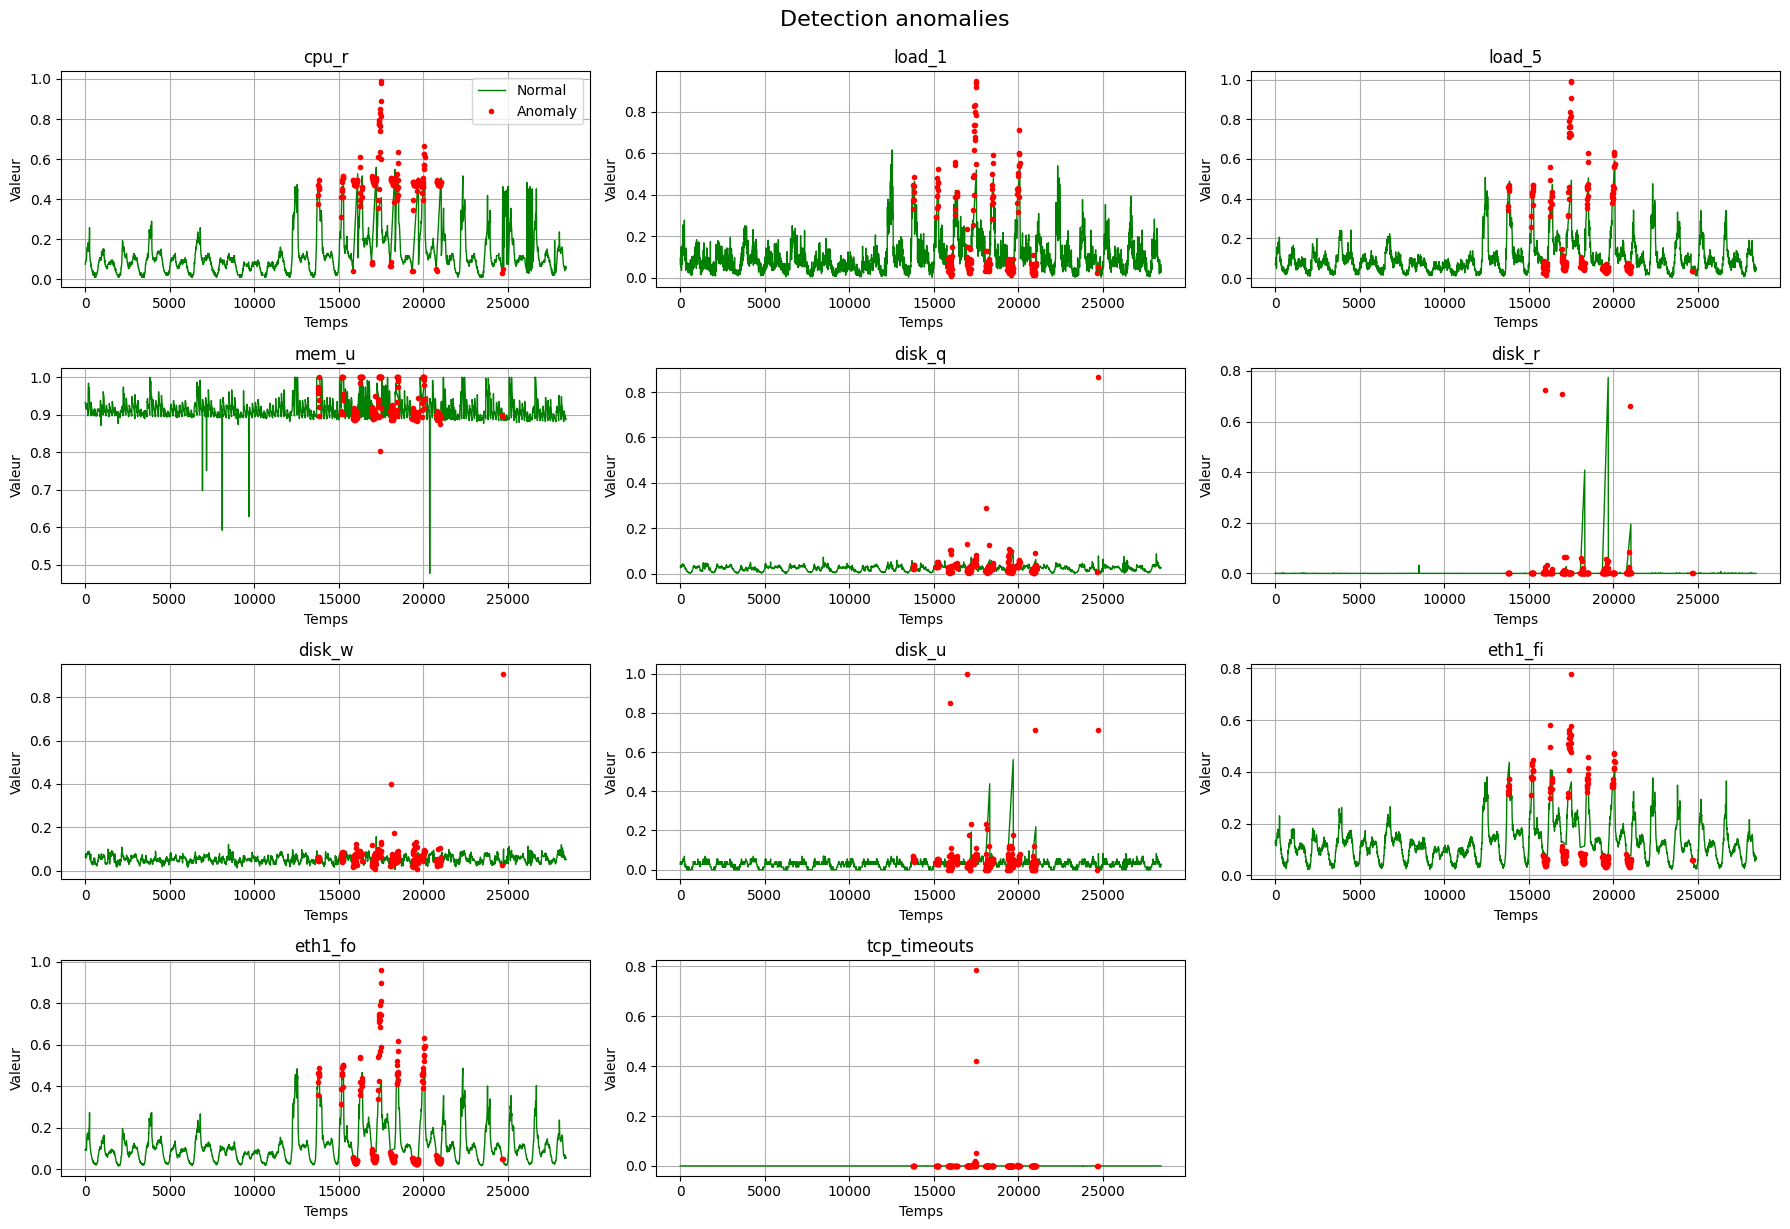

In [53]:
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, 3 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)

    normal = df_test_aligned[df_test_aligned['LSTM_pred'] == 0]
    plt.plot(normal['timestamp'], normal[feature], color='green', label='Normal', linewidth=1)

    anomalies = df_test_aligned[df_test_aligned['LSTM_pred'] == 1]
    plt.plot(anomalies['timestamp'], anomalies[feature], 'ro', label='Anomaly', markersize=3)

    plt.title(feature)
    plt.xlabel('Temps')
    plt.ylabel('Valeur')
    plt.grid(True)
    if i == 0:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.suptitle("Detection anomalies", fontsize=16, y=1.02)
plt.show()


## OmniAI

In [1]:
import pandas as pd 

train_data='machine-1-1_train_filtered.csv'
test_data='machine-1-1_test_filtered.csv'

df_train=pd.read_csv(train_data)
df_test=pd.read_csv(test_data)



In [2]:
df_train = df_train.drop(columns=['timestamp'], errors='ignore')
df_test_timestamp = df_test['timestamp'].copy()
df_test = df_test.drop(columns=['timestamp'], errors='ignore')

# Extraire le label
y_test = df_test['label'].values
df_test = df_test.drop(columns=['label'], errors='ignore')

In [3]:
def interval_to_float(df):
    for col in df.columns:
        if isinstance(df[col].iloc[0], pd.Interval):
            df[col] = df[col].apply(lambda x: x.left)
    return df

df_train = interval_to_float(df_train)
df_test = interval_to_float(df_test)


In [5]:
import numpy as np
def create_sequences(data, seq_len):
    seqs = []
    for i in range(len(data) - seq_len):
        seqs.append(data[i:i + seq_len])
    return np.array(seqs)

seq_length = 30
X_train_seq = create_sequences(df_train.values, seq_length).astype(np.float32)
X_test_seq = create_sequences(df_test.values, seq_length).astype(np.float32)
y_test_seq = y_test[seq_length:]
df_test_ts_seq = df_test_timestamp[seq_length:].reset_index(drop=True)


In [6]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class OmniLiteImproved(keras.Model):
    def __init__(self, seq_len, feat_dim, latent_dim=8, hidden_dim=128, beta=0.1):
        super().__init__()
        self.beta = beta
        self.gru_e = keras.Sequential([
            layers.GRU(hidden_dim, return_sequences=True, dropout=0.3),
            layers.LayerNormalization(),
            layers.GRU(hidden_dim, return_sequences=True)
        ])

        self.mean = layers.TimeDistributed(layers.Dense(latent_dim))
        self.log_var = layers.TimeDistributed(layers.Dense(latent_dim))
        self.gru_d = keras.Sequential([
            layers.GRU(hidden_dim, return_sequences=True, dropout=0.3),
            layers.GRU(hidden_dim, return_sequences=True)
        ])
        self.out = layers.TimeDistributed(layers.Dense(feat_dim))

    def call(self, x):
        h = self.gru_e(x)
        mu = self.mean(h)
        log_var = self.log_var(h)
        eps = tf.random.normal(tf.shape(mu))
        z = mu + tf.exp(0.5 * log_var) * eps
        dec = self.gru_d(z)
        recon = self.out(dec)
        recon_loss = tf.reduce_mean(tf.square(x - recon))
        kl = -0.5 * tf.reduce_mean(1 + log_var - mu**2 - tf.exp(log_var))
        self.add_loss(recon_loss + self.beta * kl)
        return recon


In [10]:
model = OmniLiteImproved(seq_len=seq_length, feat_dim=X_train_seq.shape[2], latent_dim=8)
model.compile(optimizer='adam')


In [11]:
history=model.fit(X_train_seq, X_train_seq, validation_split=0.1, epochs=29, batch_size=64,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])


Epoch 1/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 95s 181ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 2/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 67s 166ms/step - loss: 0.0011 - val_loss: 9.5578e-04
Epoch 4/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 51s 126ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 51s 127ms/step - loss: 0.0011 - val_loss: 9.4535e-04
Epoch 6/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 51s 127ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 51s 127ms/step - loss: 9.8772e-04 - val_loss: 0.0011
Epoch 8/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 66s 163ms/step - loss: 9.5394e-04 - val_loss: 8.9554e-04
Epoch 9/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 60s 149ms/step - loss: 8.9318e-04 - val_loss: 8.4147e-04
Epoch 10/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 60s 150ms/step - loss: 8.6527e-04 - val_loss: 9.6243e-04
Epoch 11/29
401/401 ━━━━━━━━━━━━━━━━━━━━ 59s 147ms/step - loss: 8.6671e-0

In [14]:
X_pred = model.predict(X_test_seq)
mse = np.mean(np.square(X_test_seq - X_pred), axis=(1,2))


890/890 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step


In [35]:
from sklearn.metrics import precision_recall_curve
p, r, th = precision_recall_curve(y_test_seq, mse)
f1 = 2*p*r/(p+r+1e-8)
best = th[np.argmax(f1)]
best_index = np.argmax(f1)
threshold = th[best_index]
precision_final = p[best_index]
recall_final = r[best_index]
f1_final = f1[best_index]


In [38]:
import mlflow

try:
    if mlflow.active_run():
        mlflow.end_run()
except Exception as e:
    print(f"Erreur ignorée lors de la fermeture du run actif : {e}")

# Démarrer un nouveau run
with mlflow.start_run():
    mlflow.log_metrics({
        "precision_optimal": float(precision_final),
        "recall_optimal": float(recall_final),
        "f1_score_optimal": float(f1_final),
        "threshold_optimal": float(threshold)
    })

    mlflow.keras.log_model(model, "model_OmniLiteImproved")

    mlflow.log_metric("loss", float(history.history['loss'][-1]))
    mlflow.log_metric("val_loss", float(history.history['val_loss'][-1]))



results = []
results.append({
    'threshold': threshold,
    'precision': precision_final,
    'recall': recall_final,
    'f1_score': f1_final
})


2025/08/03 14:00:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/03 14:00:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/08/03 14:00:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\pc\AppData\Local\Temp\tmp9uozvgdm\model, flavor: keras). Fall back to return ['keras==3.11.1']. Set logging level to DEBUG to see the full traceback. 
2025/08/03 14:00:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


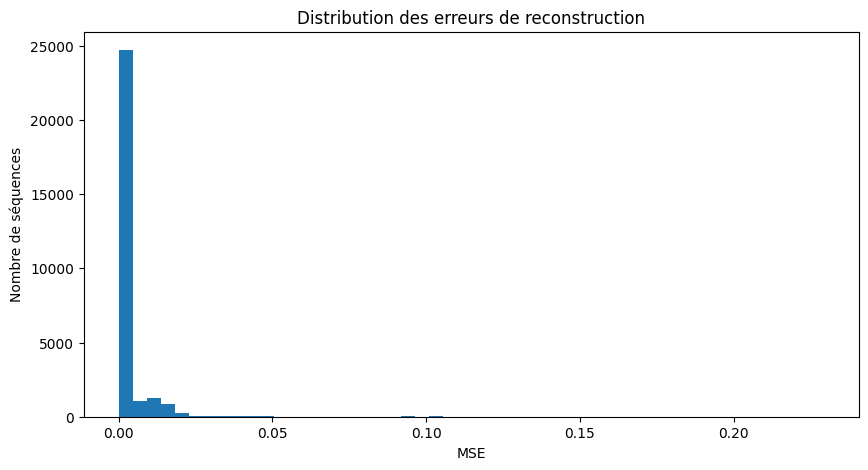

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(mse, bins=50)
plt.title("Distribution des erreurs de reconstruction")
plt.xlabel("MSE")
plt.ylabel("Nombre de séquences")
plt.show()


In [17]:
print(best)

0.011628402


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (mse > best).astype(int) 

# y_test_seq doit correspondre aux labels alignés après création des séquences
print(confusion_matrix(y_test_seq, y_pred))
print(classification_report(y_test_seq, y_pred, digits=4))


[[25376   379]
 [  846  1848]]
              precision    recall  f1-score   support

         0.0     0.9677    0.9853    0.9764     25755
         1.0     0.8298    0.6860    0.7511      2694

    accuracy                         0.9569     28449
   macro avg     0.8988    0.8356    0.8637     28449
weighted avg     0.9547    0.9569    0.9551     28449



In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

f1 = f1_score(y_test_seq, y_pred)
recall = recall_score(y_test_seq, y_pred)
precision = precision_score(y_test_seq, y_pred)
auc = roc_auc_score(y_test_seq, mse)

print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {auc:.4f}")


F1-score: 0.7511
Recall: 0.6860
Precision: 0.8298
AUC: 0.9622


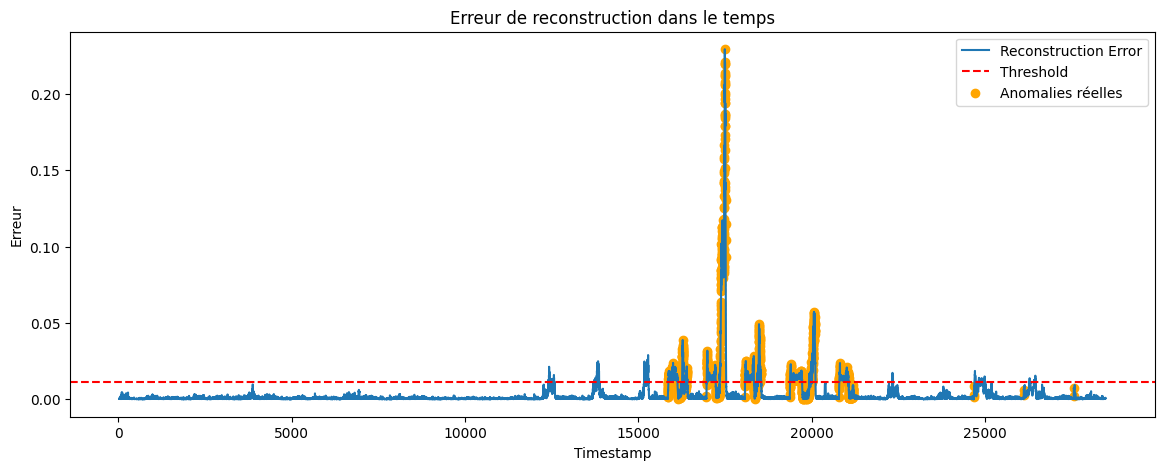

In [23]:
plt.figure(figsize=(14,5))
plt.plot(df_test_ts_seq, mse, label='Reconstruction Error')
plt.axhline(y=best, color='red', linestyle='--', label='Threshold')
plt.scatter(df_test_ts_seq[y_test_seq==1], mse[y_test_seq==1], color='orange', label='Anomalies réelles')
plt.legend()
plt.title('Erreur de reconstruction dans le temps')
plt.xlabel('Timestamp')
plt.ylabel('Erreur')
plt.show()


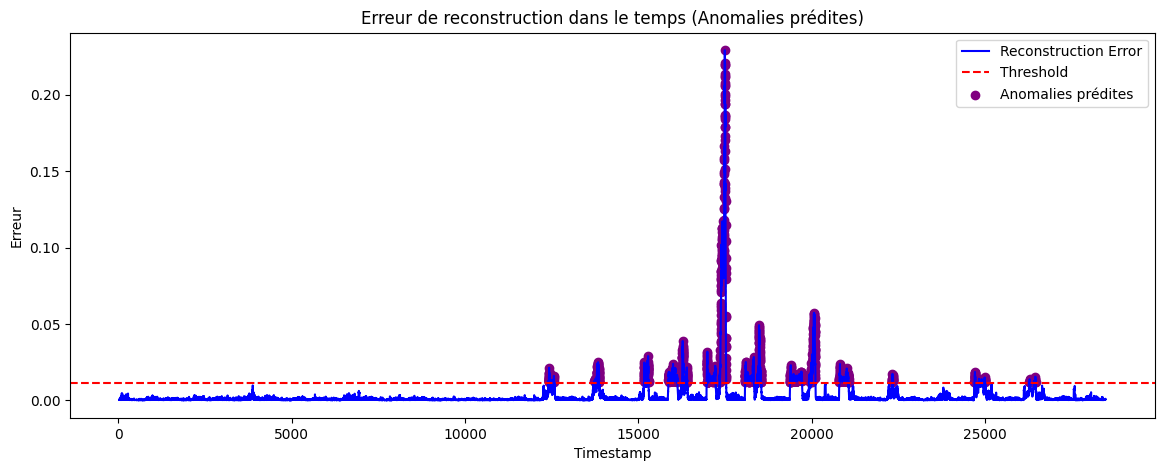

In [22]:
import matplotlib.pyplot as plt

predicted_anomalies_idx = np.where(mse > best)[0]

plt.figure(figsize=(14, 5))
plt.plot(df_test_ts_seq, mse, label='Reconstruction Error', color='blue')

# Seuil
plt.axhline(y=best, color='red', linestyle='--', label='Threshold')

plt.scatter(df_test_ts_seq[predicted_anomalies_idx],
            mse[predicted_anomalies_idx],
            color='purple',
            label='Anomalies prédites')

plt.legend()
plt.title('Erreur de reconstruction dans le temps (Anomalies prédites)')
plt.xlabel('Timestamp')
plt.ylabel('Erreur')
plt.show()
